### ALBERT MONTILLA
### VARIABLE OBJETIVO P2: TRATAMIENTO REESTRUCTURADOS, ANALISIS VINTAGE, DESMEJORA.

#### IMPORTAMOS LIBRERIAS

In [1]:
import pandas as pd
from datetime import datetime
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import math
import matplotlib.pyplot as plt
import numpy as np
import math

#### LEEMOS LA BASE DE DATOS CON LAS TRANSACCIONES MES A MES

In [2]:
Base_Independientes = pd.read_excel('../data/raw/Base_Independientes.xlsx')

In [3]:
Base_Independientes.head()

FECHA    CLIENTE                        SECTOR1 SECTOR4  SALDO  \
0  20220228  990035508  Ahorro Persona Natural/Fisica     NaN   0.03   
1  20220228  990035509  Ahorro Persona Natural/Fisica     NaN   1.05   
2  20220228  990035510  Ahorro Persona Natural/Fisica     NaN   4.06   
3  20220228  990035514  Ahorro Persona Natural/Fisica     NaN   0.18   
4  20220228  990035551  Ahorro Persona Natural/Fisica     NaN   2.13   

   FECHA_INICIO  FECHA_VENCIMIENTO  DIAS_MORA RANGO_MORA  \
0      20200902                NaN        NaN        NaN   
1      20200903                NaN        NaN        NaN   
2      20200903                NaN        NaN        NaN   
3      20200903                NaN        NaN        NaN   
4      20200903                NaN        NaN        NaN   

   PROXIMO_PAGO_CAPITAL  PROXIMO_PAGO_INTERES  fecha_reestructurado  \
0                   NaN                   NaN                   NaN   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4                   NaN                   NaN                   NaN   

   clasificacion_Regulatoria  MONTO_IN  CUOTA_XPAGAR  ingreso segmento  \
0                        NaN       NaN           NaN      NaN      NaN   
1                        NaN       NaN           NaN      NaN      NaN   
2                        NaN       NaN           NaN      NaN      NaN   
3                        NaN       NaN           NaN      NaN      NaN   
4                        NaN       NaN           NaN      NaN      NaN   

  cartera  max_mora_ult_12M Descripcion_Nivel_Educacion Estadocivil  Genero  \
0  PASIVO               NaN                    Primaria     MARRIED    MALE   
1  PASIVO               NaN                    Primaria     MARRIED    MALE   
2  PASIVO               NaN                    Primaria      SINGLE  FEMALE   
3  PASIVO               NaN               Universitario     MARRIED    MALE   
4  PASIVO               NaN                    Primaria       OTHER  FEMALE   

   cantidad_Dependientes          Cargo       DescripcionIndustria  \
0                      0      NO APLICA      ASESORIA Y ASISTENCIA   
1                      0      NO APLICA  CARPINTERIA Y EBANISTERIA   
2                      0      NO APLICA                       ARTE   
3                      0  ADMINISTRADOR                  ALIMENTOS   
4                      0      NO APLICA                  ALIMENTOS   

  DescripcionSector Nacionalidad Residencia TiempoRelacionBanco  \
0         P Natural           VE         PA                  2Y   
1         P Natural           PA         PA                  2Y   
2         P Natural           VE         PA                  2Y   
3         P Natural           PA         PA                  2Y   
4         P Natural           PA         PA                  2Y   

  CLASIFICACION_4 CLASIFICACION_5 SubTipoCliente  FechaNacimiento  \
0       SERVICIOS  INDEPENDIENTES              -         19680108   
1    CONSTRUCCION  INDEPENDIENTES              -         19810817   
2       SERVICIOS  INDEPENDIENTES              -         19951018   
3     COMERCIALES  INDEPENDIENTES              -         19880605   
4     COMERCIALES  INDEPENDIENTES              -         19950109   

   Imgreso_DIMCLIENTES  IngresoMensual  FechaEmpleoActual    pais  \
0               3500.0          3500.0           20200903  PANAMA   
1               1500.0          1500.0           20200903  PANAMA   
2                500.0           500.0           20200903  PANAMA   
3               3000.0          3000.0           20200903  PANAMA   
4                800.0           800.0           20200903  PANAMA   

      provincia  ciudad Fecha_Ult_pago_Interes Fecha_Ult_pago_Capital  \
0        PANAMA  Panama                    NaN                    NaN   
1  PANAMA OESTE  Panama                    NaN                   

#### REALIZAMOS ALGUNOS ANALISIS DESCRIPTIVOS PARA ENTENDER LA DATA

In [4]:
Base_Independientes.FECHA.max()

20220731

In [5]:
Base_Independientes.segmento.value_counts()

MASIVO LOCAL                           8345
LOCAL RETAIL?MA                        1951
PREMIUM LOCAL                           827
LOCAL PREMIUM?P                         162
PYME P.NATURAL LOCAL                    128
AGROPECUARIO P.NATURAL LOCAL             70
BANCA MASIVA                             52
COLABORADOR MASIVO                       50
LOCAL PYME?PYME                          31
COMUNITARIA LOCAL                        29
PRIVADA INTERNACIONAL                    20
COLABORADOR PREMIUM                      20
PYME P.JURIDICO LOCAL                    13
LOCAL AGRICULTU                          12
NO APLICA                                12
SOCIAL BANK LOC                          10
BANESCO EMPLOYE                          10
PLANILLA EMPRESARIAL LOCAL               10
INTERNATIONAL P                           8
MASIVO INTERNACIONAL                      8
EMPRESAS INTERNACIONAL                    6
PREMIUM INTERNACIONAL                     6
EMPLOYEE PREMIU                 

In [6]:
Base_Independientes.SECTOR1 = Base_Independientes.SECTOR1.str.upper()
Base_Independientes[Base_Independientes['cartera'] == 'activo']['SECTOR1'].value_counts()

TDC                     181427
HIPOTECA RESIDENCIAL     34614
CONSUMO PERSONAL         33728
AUTO                     13558
Name: SECTOR1, dtype: int64

#### INICIAMOS CON LA TRANSFORMACIONES DE LOS DATOS PARA LOGRAR MANIPULAR LA INFORMACION CON MAYOR FACILIDAD

In [7]:
Base_Independientes['fecha_reestructurado'] = Base_Independientes['fecha_reestructurado'].fillna('n')

In [8]:
str(Base_Independientes.loc[11,'fecha_reestructurado'])[:-2]

'20210602'

In [9]:
Base_Independientes['fecha_reestructurado'] = Base_Independientes['fecha_reestructurado'].apply(lambda x: str(x)[:-2] if x!='n' else 'n')

In [10]:
date_format = '%Y%m%d'
Base_Independientes['FECHA'] = Base_Independientes.FECHA.apply(lambda x: datetime.strptime(str(x),date_format))
Base_Independientes['FECHA_INICIO'] = Base_Independientes.FECHA_INICIO.apply(lambda x: datetime.strptime(str(x),date_format))
Base_Independientes['fecha_reestructurado'] = Base_Independientes.fecha_reestructurado.apply(lambda x: datetime.strptime(str(x),date_format) if x!='n' else np.nan)


#### FILTRAMOS LA BASE DE DATOS POR LOS PRODUCTOS DE ACTIVOS

In [11]:
filtro = (Base_Independientes['SECTOR1'] == 'TDC') |  (Base_Independientes['SECTOR1'] == 'HIPOTECA RESIDENCIAL') | (Base_Independientes['SECTOR1'] == 'CONSUMO PERSONAL')| (Base_Independientes['SECTOR1'] == 'AUTO') 

In [12]:
Base_Independientes_f = Base_Independientes[filtro]
Base_Independientes_f = Base_Independientes_f.reset_index(drop=True)

#### TRANSFORMACION DE VARIABLES FECHAS

In [13]:
Base_Independientes_f['mes']= Base_Independientes_f['FECHA'].dt.to_period('M')
Base_Independientes_f['mes_inicio']= Base_Independientes_f['FECHA_INICIO'].dt.to_period('M')
Base_Independientes_f['mes_reestructurado']= Base_Independientes_f['fecha_reestructurado'].dt.to_period('M')

#### ALGUNAS VISUALIZACIONES DE LA BASE DE DATOS FILTRADA

In [14]:
Base_Independientes_f[(Base_Independientes_f.fecha_reestructurado.notnull() & (Base_Independientes_f.CLIENTE ==600203459))].sort_values('FECHA')[['FECHA_INICIO','CLIENTE','FECHA','SECTOR1','categoria_cambio','fecha_reestructurado']]

FECHA_INICIO    CLIENTE      FECHA           SECTOR1  categoria_cambio  \
148551   2016-10-28  600203459 2020-01-31               TDC               NaN   
125016   2016-10-28  600203459 2020-02-29               TDC               NaN   
70371    2016-10-28  600203459 2020-03-31               TDC               NaN   
163908   2016-10-28  600203459 2020-04-30               TDC               3.0   
196078   2016-10-28  600203459 2020-05-31               TDC               2.0   
243914   2016-10-28  600203459 2020-06-30               TDC               2.0   
100044   2016-10-28  600203459 2020-07-31               TDC               2.0   
131175   2016-10-28  600203459 2020-08-31               TDC               3.0   
163454   2016-10-28  600203459 2020-09-30               TDC               3.0   
189342   2016-10-28  600203459 2020-10-31               TDC               3.0   
194955   2016-10-28  600203459 2020-11-30               TDC               3.0   
194674   2016-10-28  600203459 2020-12-31               TDC               3.0   
74495    2016-10-28  600203459 2021-01-31               TDC               3.0   
32329    2016-10-28  600203459 2021-02-28               TDC               3.0   
79687    2016-10-28  600203459 2021-03-31               TDC               3.0   
180751   2016-10-28  600203459 2021-04-30               TDC               3.0   
104083   2016-10-28  600203459 2021-05-31               TDC               3.0   
21535    2016-10-28  600203459 2021-06-30               TDC               3.0   
75728    2016-10-28  600203459 2021-07-31               TDC               3.0   
47915    2016-10-28  600203459 2021-08-31               TDC               3.0   
48141    2016-10-28  600203459 2021-09-30               TDC               3.0   
150466   2016-10-28  600203459 2021-10-31               TDC               3.0   
11919    2016-10-28  600203459 2021-11-30               TDC               3.0   
207755   2016-10-28  600203459 2021-12-31               TDC               3.0   
257458   2016-10-28  600203459 2022-01-31               TDC               3.0   
150861   2016-10-28  600203459 2022-02-28               TDC               3.0   
138347   2016-10-28  600203459 2022-03-31               TDC               3.0   
223870   2016-10-28  600203459 2022-04-30               TDC               3.0   
111884   2022-05-30  600203459 2022-05-31  CONSUMO PERSONAL               3.0   
139060   2022-05-30  600203459 2022-06-30  CONSUMO PERSONAL               3.0   
124      2022-05-30  600203459 2022-07-31  CONSUMO PERSONAL               3.0   

       fecha_reestructurado  
148551           2020-01-13  
125016           2020-01-13  
70371            2020-01-13  
163908           2020-04-24  
196078           2020-01-13  
243914           2020-01-13  
100044           2020-01-13  
131175           2020-08-13  
163454           2020-08-13  
189342           2020-08-13  
194955           2020-08-13  
194674           2020-08-13  
74495            2020-08-13  
32329            2020-08-13  
79687            2020-08-13  
180751           2020-08-13  
104083           2020-08-13  
21535            2020-08-13  
75728            2020-08-13  
47915            2020-08-13  
48141            2020-08-13  
150466           2020-08-13  
11919            2020-08-13  
207755           2020-08-13  
257458           2020-08-13  
150861           2020-08-13  
138347           2020-08-13  
223870           2020-08-13  
111884           2022-05-30  
139060           2022-05-30  
124              2022-05-30

In [15]:
Base_Independientes_f[(Base_Independientes_f.fecha_reestructurado.notnull())]

FECHA    CLIENTE               SECTOR1  \
1      2022-02-28  600086511  HIPOTECA RESIDENCIAL   
20     2022-03-31  600194073                   TDC   
23     2022-05-31  600156551      CONSUMO PERSONAL   
40     2017-02-28  600016275  HIPOTECA RESIDENCIAL   
62     2017-09-30  600112469  HIPOTECA RESIDENCIAL   
124    2022-07-31  600203459      CONSUMO PERSONAL   
186    2018-08-31  600112394  HIPOTECA RESIDENCIAL   
242    2017-12-31  600112394  HIPOTECA RESIDENCIAL   
380    2019-01-31  600112469  HIPOTECA RESIDENCIAL   
385    2019-02-28  600017595  HIPOTECA RESIDENCIAL   
471    2019-09-30  600193322      CONSUMO PERSONAL   
478    2019-10-31  600057766  HIPOTECA RESIDENCIAL   
488    2019-11-30  600070104                   TDC   
532    2020-04-30  600018666                   TDC   
534    2020-04-30  600114372                   TDC   
535    2020-04-30  600223768                   TDC   
536    2020-04-30  600217493                   TDC   
538    2020-04-30  600227072                   TDC   
539    2020-04-30  600013503                   TDC   
540    2020-04-30  600066366                   TDC   
544    2020-04-30  600198826                   TDC   
545    2020-04-30  600226747                   TDC   
546    2020-04-30  600210713                   TDC   
547    2020-04-30  600209346                   TDC   
548    2020-04-30  600191766                   TDC   
549    2020-04-30  600042474                   TDC   
550    2020-04-30  600190739                   TDC   
551    2020-04-30  600237706                   TDC   
553    2020-05-31  600193439                   TDC   
556    2020-07-31  600220006  HIPOTECA RESIDENCIAL   
557    2020-07-31  600217655  HIPOTECA RESIDENCIAL   
559    2020-07-31  600047927  HIPOTECA RESIDENCIAL   
560    2020-07-31  600214287  HIPOTECA RESIDENCIAL   
561    2020-07-31  600202312  HIPOTECA RESIDENCIAL   
564    2020-07-31  600221062                   TDC   
566    2020-08-31  600079775                   TDC   
567    2020-09-30  600092913                   TDC   
568    2020-09-30  600039941                   TDC   
569    2020-09-30  600100036                   TDC   
572    2020-09-30  600134240                   TDC   
574    2020-09-30  600012510                   TDC   
577    2020-10-31  990002797                  AUTO   
578    2020-10-31  600024956      CONSUMO PERSONAL   
579    2020-10-31  600133935      CONSUMO PERSONAL   
581    2020-10-31  600225109                   TDC   
582    2020-10-31  600226856                   TDC   
586    2020-11-30  600235797                  AUTO   
587    2020-11-30  600235046                  AUTO   
588    2020-11-30  600235895                  AUTO   
589    2020-11-30  600233887                  AUTO   
590    2020-11-30  800103596                  AUTO   
591    2020-11-30  600236930                  AUTO   
592    2020-11-30  600015600                  AUTO   
594    2020-11-30  600150579                   TDC   
596    2020-11-30  600068287                   TDC   
599    2020-11-30  600023459                   TDC   
600    2020-11-30  600165023                   TDC   
602    2020-12-31  600084200                  AUTO   
603    2020-12-31  600093250                  AUTO   
604    2020-12-31  600217125                  AUTO   
605    2020-12-31  600212970                  AUTO   
606    2020-12-31  600155246                  AUTO   
607    2020-12-31  600234238                  AUTO   
608    2020-12-31  600101503                  AUTO   
609    2020-12-31  600015520                  AUTO   
610    2020-12-31  600234055                  AUTO   
611    2020-12-31  600089392                  AUTO   
612    2020-12-31  600192173                   TDC   
615    2020-12-31  600138866                   TDC   
619    2020-12-31  600022827                   TDC   
620    2020-12-31  600220902                   TDC   
622    2020-12-31  600067744                   TDC   
625    2021-01-31  600226477                   TDC   
629    2021-01-3

In [16]:
Base_Independientes_f[Base_Independientes_f.fecha_reestructurado.notnull()]

FECHA    CLIENTE               SECTOR1  \
1      2022-02-28  600086511  HIPOTECA RESIDENCIAL   
20     2022-03-31  600194073                   TDC   
23     2022-05-31  600156551      CONSUMO PERSONAL   
40     2017-02-28  600016275  HIPOTECA RESIDENCIAL   
62     2017-09-30  600112469  HIPOTECA RESIDENCIAL   
124    2022-07-31  600203459      CONSUMO PERSONAL   
186    2018-08-31  600112394  HIPOTECA RESIDENCIAL   
242    2017-12-31  600112394  HIPOTECA RESIDENCIAL   
380    2019-01-31  600112469  HIPOTECA RESIDENCIAL   
385    2019-02-28  600017595  HIPOTECA RESIDENCIAL   
471    2019-09-30  600193322      CONSUMO PERSONAL   
478    2019-10-31  600057766  HIPOTECA RESIDENCIAL   
488    2019-11-30  600070104                   TDC   
532    2020-04-30  600018666                   TDC   
534    2020-04-30  600114372                   TDC   
535    2020-04-30  600223768                   TDC   
536    2020-04-30  600217493                   TDC   
538    2020-04-30  600227072                   TDC   
539    2020-04-30  600013503                   TDC   
540    2020-04-30  600066366                   TDC   
544    2020-04-30  600198826                   TDC   
545    2020-04-30  600226747                   TDC   
546    2020-04-30  600210713                   TDC   
547    2020-04-30  600209346                   TDC   
548    2020-04-30  600191766                   TDC   
549    2020-04-30  600042474                   TDC   
550    2020-04-30  600190739                   TDC   
551    2020-04-30  600237706                   TDC   
553    2020-05-31  600193439                   TDC   
556    2020-07-31  600220006  HIPOTECA RESIDENCIAL   
557    2020-07-31  600217655  HIPOTECA RESIDENCIAL   
559    2020-07-31  600047927  HIPOTECA RESIDENCIAL   
560    2020-07-31  600214287  HIPOTECA RESIDENCIAL   
561    2020-07-31  600202312  HIPOTECA RESIDENCIAL   
564    2020-07-31  600221062                   TDC   
566    2020-08-31  600079775                   TDC   
567    2020-09-30  600092913                   TDC   
568    2020-09-30  600039941                   TDC   
569    2020-09-30  600100036                   TDC   
572    2020-09-30  600134240                   TDC   
574    2020-09-30  600012510                   TDC   
577    2020-10-31  990002797                  AUTO   
578    2020-10-31  600024956      CONSUMO PERSONAL   
579    2020-10-31  600133935      CONSUMO PERSONAL   
581    2020-10-31  600225109                   TDC   
582    2020-10-31  600226856                   TDC   
586    2020-11-30  600235797                  AUTO   
587    2020-11-30  600235046                  AUTO   
588    2020-11-30  600235895                  AUTO   
589    2020-11-30  600233887                  AUTO   
590    2020-11-30  800103596                  AUTO   
591    2020-11-30  600236930                  AUTO   
592    2020-11-30  600015600                  AUTO   
594    2020-11-30  600150579                   TDC   
596    2020-11-30  600068287                   TDC   
599    2020-11-30  600023459                   TDC   
600    2020-11-30  600165023                   TDC   
602    2020-12-31  600084200                  AUTO   
603    2020-12-31  600093250                  AUTO   
604    2020-12-31  600217125                  AUTO   
605    2020-12-31  600212970                  AUTO   
606    2020-12-31  600155246                  AUTO   
607    2020-12-31  600234238                  AUTO   
608    2020-12-31  600101503                  AUTO   
609    2020-12-31  600015520                  AUTO   
610    2020-12-31  600234055                  AUTO   
611    2020-12-31  600089392                  AUTO   
612    2020-12-31  600192173                   TDC   
615    2020-12-31  600138866                   TDC   
619    2020-12-31  600022827                   TDC   
620    2020-12-31  600220902                   TDC   
622    2020-12-31  600067744                   TDC   
625    2021-01-31  600226477                   TDC   
629    2021-01-3

In [17]:
Base_Independientes_f.loc[0,'FECHA']

Timestamp('2022-02-28 00:00:00')

In [18]:
Base_Independientes_f.loc[0,'FECHA_INICIO']

Timestamp('2014-09-25 00:00:00')

In [19]:
Base_Independientes_f.loc[0,'mes']

Period('2022-02', 'M')

#### TRATAMIENTO PARA REESTRUCTURADOS

Tratamiento Restructurados inicial:

1. filtrar la base de datos que tengan categoria cambio igual a 2
2. agrupar por cliente y mes_inicio.
3. la fecha minima de operacion.
4. unir con final_mora left join por cliente y mes_inicio. (con final_mora de primero) 

Tratamiento Reestructurado final:

1. filtrar una con fecha mayor a 2020 (mayor)
2. y otra con fecha menor a 2020 (menor)
3. con la fecha mayor el tratamiento anterior
4. con la fecha menor el tratamiento seria agrupar por cliente y mes_inicio y tomar la min fecha de reestructuracion.
5. despues unir las dos bases de datos. igual validar. (y si hay algunos quedarme con la minima fecha de restructuracion)
20200430

In [20]:
Base_Independientes_f_menor = Base_Independientes_f[Base_Independientes_f.FECHA <= pd.Timestamp(2020, 4, 30)]
Base_Independientes_f_mayor = Base_Independientes_f[Base_Independientes_f.FECHA > pd.Timestamp(2020, 4, 30)]

In [21]:
len(Base_Independientes_f)

263327

In [22]:
len(Base_Independientes_f_menor)

154156

In [23]:
len(Base_Independientes_f_mayor)

109171

In [24]:
len(Base_Independientes_f_menor) + len(Base_Independientes_f_mayor)

263327

In [25]:
#RESTRUCTURADOS = Base_Independientes_f[Base_Independientes_f.categoria_cambio == 2]
#RESTRUCTURADOS = RESTRUCTURADOS.groupby(['mes_inicio','CLIENTE'])['mes'].agg({"min"}).reset_index()
#RESTRUCTURADOS['mes_restructurado'] = RESTRUCTURADOS['min']
#del RESTRUCTURADOS['min']

In [26]:
RESTRUCTURADOS = Base_Independientes_f_mayor[Base_Independientes_f_mayor.categoria_cambio == 2]
RESTRUCTURADOS = RESTRUCTURADOS.groupby(['mes_inicio','CLIENTE'])['mes'].agg({"min"}).reset_index()
RESTRUCTURADOS['mes_restructurado'] = RESTRUCTURADOS['min']
del RESTRUCTURADOS['min']

In [27]:
RESTRUCTURADOS.head()

mes_inicio    CLIENTE mes_restructurado
0    2007-12  600007221           2022-05
1    2008-01  600008505           2020-06
2    2008-08  600012806           2020-06
3    2009-02  600013461           2022-01
4    2010-03  600051112           2020-08

In [28]:
RESTRUCTURADOS_menor = Base_Independientes_f_menor
RESTRUCTURADOS_menor = RESTRUCTURADOS_menor.groupby(['mes_inicio','CLIENTE'])['mes_reestructurado'].agg({"min"}).reset_index()
RESTRUCTURADOS_menor['mes_restructurado'] = RESTRUCTURADOS_menor['min']
del RESTRUCTURADOS_menor['min']

In [29]:
RESTRUCTURADOS_menor

mes_inicio    CLIENTE mes_restructurado
0       2007-10  600001308               NaT
1       2007-11  600002337               NaT
2       2007-12  600003363           2011-10
3       2007-12  600006262               NaT
4       2007-12  600007221           2020-03
5       2008-01  600000781           2020-03
6       2008-01  600006262               NaT
7       2008-01  600008505           2019-10
8       2008-01  600008646               NaT
9       2008-02  600000267           2016-07
10      2008-02  600007675           2020-03
11      2008-03  600005155           2020-03
12      2008-03  600010738           2020-03
13      2008-03  600011103           2019-10
14      2008-03  600011451               NaT
15      2008-03  600013866           2020-03
16      2008-04  600007718           2020-03
17      2008-04  600012933           2020-03
18      2008-05  600001475               NaT
19      2008-05  600002961               NaT
20      2008-05  600010295           2020-03
21      2008-05  600014654           2020-03
22      2008-05  600014664               NaT
23      2008-06  600001152           2020-03
24      2008-06  600004868               NaT
25      2008-06  600011625           2020-03
26      2008-06  600016465               NaT
27      2008-07  600008285           2018-03
28      2008-07  600011875           2020-03
29      2008-07  600015835               NaT
30      2008-07  600017027               NaT
31      2008-07  600019044               NaT
32      2008-08  600000008           2020-03
33      2008-08  600011704               NaT
34      2008-08  600012515               NaT
35      2008-08  600012806           2019-12
36      2008-08  600013268           2020-03
37      2008-08  600020626           2020-03
38      2008-08  600020632           2020-03
39      2008-09  600000358               NaT
40      2008-09  600005239               NaT
41      2008-09  600007564               NaT
42      2008-09  600008313               NaT
43      2008-09  600009222           2020-03
44      2008-09  600014188               NaT
45      2008-09  600020836           2016-10
46      2008-09  600020944               NaT
47      2008-09  600021249               NaT
48      2008-10  600013268           2020-03
49      2008-10  600018232           2020-03
50      2008-10  600018657           2020-03
51      2008-10  600020836           2020-03
52      2008-10  600022478               NaT
53      2008-10  600023802               NaT
54      2008-11  201421604               NaT
55      2008-11  600010427           2020-03
56      2008-11  600023815               NaT
57      2008-11  600024644           2020-03
58      2008-11  600025830           2018-05
59      2008-11  600027955               NaT
60      2008-12  600025379               NaT
61      2008-12  600026792               NaT
62      2008-12  600027806               NaT
63      2009-01  600007691               NaT
64      2009-01  600018138               NaT
65      2009-01  600023001           2020-03
66      2009-01  600028159               NaT
67      2009-01  600028209           2010-10
68      2009-01  600028362           2020-03
69      2009-01  600029196           2017-12
70      2009-01  600030451           2020-03
71      2009-01  600030858               NaT
72      2009-01  600031844           2020-03
73      2009-02  600000008           2020-03
74      2009-02  600000034               NaT
75      2009-02  600013461           2016-05
76      2009-02  600020010           2020-03
77      2009-02  600022404               NaT
78      2009-02  600031045               NaT
79      2009-03  600016275           2016-06
80      2009-03  600021861           2020-03
81      2009-03  600032196               NaT
82      2009-03  600032876           2020-03
83      2009-04  600008507           2020-03
84      2009-04  600021964           2020-03
85      2009-04  600023802           2020-03
86      2009-04  600026967           2020-03
87      2009-05  600004434           2020-03


In [30]:
RESTRUCTURADOS2 = pd.concat([RESTRUCTURADOS_menor,RESTRUCTURADOS], sort=False)

In [31]:
RESTRUCTURADOS2

mes_inicio    CLIENTE mes_restructurado
0      2007-10  600001308               NaT
1      2007-11  600002337               NaT
2      2007-12  600003363           2011-10
3      2007-12  600006262               NaT
4      2007-12  600007221           2020-03
5      2008-01  600000781           2020-03
6      2008-01  600006262               NaT
7      2008-01  600008505           2019-10
8      2008-01  600008646               NaT
9      2008-02  600000267           2016-07
10     2008-02  600007675           2020-03
11     2008-03  600005155           2020-03
12     2008-03  600010738           2020-03
13     2008-03  600011103           2019-10
14     2008-03  600011451               NaT
15     2008-03  600013866           2020-03
16     2008-04  600007718           2020-03
17     2008-04  600012933           2020-03
18     2008-05  600001475               NaT
19     2008-05  600002961               NaT
20     2008-05  600010295           2020-03
21     2008-05  600014654           2020-03
22     2008-05  600014664               NaT
23     2008-06  600001152           2020-03
24     2008-06  600004868               NaT
25     2008-06  600011625           2020-03
26     2008-06  600016465               NaT
27     2008-07  600008285           2018-03
28     2008-07  600011875           2020-03
29     2008-07  600015835               NaT
30     2008-07  600017027               NaT
31     2008-07  600019044               NaT
32     2008-08  600000008           2020-03
33     2008-08  600011704               NaT
34     2008-08  600012515               NaT
35     2008-08  600012806           2019-12
36     2008-08  600013268           2020-03
37     2008-08  600020626           2020-03
38     2008-08  600020632           2020-03
39     2008-09  600000358               NaT
40     2008-09  600005239               NaT
41     2008-09  600007564               NaT
42     2008-09  600008313               NaT
43     2008-09  600009222           2020-03
44     2008-09  600014188               NaT
45     2008-09  600020836           2016-10
46     2008-09  600020944               NaT
47     2008-09  600021249               NaT
48     2008-10  600013268           2020-03
49     2008-10  600018232           2020-03
50     2008-10  600018657           2020-03
51     2008-10  600020836           2020-03
52     2008-10  600022478               NaT
53     2008-10  600023802               NaT
54     2008-11  201421604               NaT
55     2008-11  600010427           2020-03
56     2008-11  600023815               NaT
57     2008-11  600024644           2020-03
58     2008-11  600025830           2018-05
59     2008-11  600027955               NaT
60     2008-12  600025379               NaT
61     2008-12  600026792               NaT
62     2008-12  600027806               NaT
63     2009-01  600007691               NaT
64     2009-01  600018138               NaT
65     2009-01  600023001           2020-03
66     2009-01  600028159               NaT
67     2009-01  600028209           2010-10
68     2009-01  600028362           2020-03
69     2009-01  600029196           2017-12
70     2009-01  600030451           2020-03
71     2009-01  600030858               NaT
72     2009-01  600031844           2020-03
73     2009-02  600000008           2020-03
74     2009-02  600000034               NaT
75     2009-02  600013461           2016-05
76     2009-02  600020010           2020-03
77     2009-02  600022404               NaT
78     2009-02  600031045               NaT
79     2009-03  600016275           2016-06
80     2009-03  600021861           2020-03
81     2009-03  600032196               NaT
82     2009-03  600032876           2020-03
83     2009-04  600008507           2020-03
84     2009-04  600021964           2020-03
85     2009-04  600023802           2020-03
86     2009-04  600026967           2020-03
87     2009-05  600004434           2020-03
88     2009-05  600034694               NaT
89     2009-05  600035488           2020-03


In [32]:
RESTRUCTURADOS_f = RESTRUCTURADOS2.groupby(['mes_inicio','CLIENTE'])['mes_restructurado'].agg({"min"}).reset_index()
RESTRUCTURADOS_f['mes_restructurado'] = RESTRUCTURADOS_f['min']
del RESTRUCTURADOS_f['min']

In [33]:
RESTRUCTURADOS_f

mes_inicio    CLIENTE mes_restructurado
0       2007-10  600001308               NaT
1       2007-11  600002337               NaT
2       2007-12  600003363           2011-10
3       2007-12  600006262               NaT
4       2007-12  600007221           2020-03
5       2008-01  600000781           2020-03
6       2008-01  600006262               NaT
7       2008-01  600008505           2019-10
8       2008-01  600008646               NaT
9       2008-02  600000267           2016-07
10      2008-02  600007675           2020-03
11      2008-03  600005155           2020-03
12      2008-03  600010738           2020-03
13      2008-03  600011103           2019-10
14      2008-03  600011451               NaT
15      2008-03  600013866           2020-03
16      2008-04  600007718           2020-03
17      2008-04  600012933           2020-03
18      2008-05  600001475               NaT
19      2008-05  600002961               NaT
20      2008-05  600010295           2020-03
21      2008-05  600014654           2020-03
22      2008-05  600014664               NaT
23      2008-06  600001152           2020-03
24      2008-06  600004868               NaT
25      2008-06  600011625           2020-03
26      2008-06  600016465               NaT
27      2008-07  600008285           2018-03
28      2008-07  600011875           2020-03
29      2008-07  600015835               NaT
30      2008-07  600017027               NaT
31      2008-07  600019044               NaT
32      2008-08  600000008           2020-03
33      2008-08  600011704               NaT
34      2008-08  600012515               NaT
35      2008-08  600012806           2019-12
36      2008-08  600013268           2020-03
37      2008-08  600020626           2020-03
38      2008-08  600020632           2020-03
39      2008-09  600000358               NaT
40      2008-09  600005239               NaT
41      2008-09  600007564               NaT
42      2008-09  600008313               NaT
43      2008-09  600009222           2020-03
44      2008-09  600014188               NaT
45      2008-09  600020836           2016-10
46      2008-09  600020944               NaT
47      2008-09  600021249               NaT
48      2008-10  600013268           2020-03
49      2008-10  600018232           2020-03
50      2008-10  600018657           2020-03
51      2008-10  600020836           2020-03
52      2008-10  600022478               NaT
53      2008-10  600023802               NaT
54      2008-11  201421604               NaT
55      2008-11  600010427           2020-03
56      2008-11  600023815               NaT
57      2008-11  600024644           2020-03
58      2008-11  600025830           2018-05
59      2008-11  600027955               NaT
60      2008-12  600025379               NaT
61      2008-12  600026792               NaT
62      2008-12  600027806               NaT
63      2009-01  600007691               NaT
64      2009-01  600018138               NaT
65      2009-01  600023001           2020-03
66      2009-01  600028159               NaT
67      2009-01  600028209           2010-10
68      2009-01  600028362           2020-03
69      2009-01  600029196           2017-12
70      2009-01  600030451           2020-03
71      2009-01  600030858               NaT
72      2009-01  600031844           2020-03
73      2009-02  600000008           2020-03
74      2009-02  600000034               NaT
75      2009-02  600013461           2016-05
76      2009-02  600020010           2020-03
77      2009-02  600022404               NaT
78      2009-02  600031045               NaT
79      2009-03  600016275           2016-06
80      2009-03  600021861           2020-03
81      2009-03  600032196               NaT
82      2009-03  600032876           2020-03
83      2009-04  600008507           2020-03
84      2009-04  600021964           2020-03
85      2009-04  600023802           2020-03
86      2009-04  600026967           2020-03
87      2009-05  600004434           2020-03


In [34]:
len(RESTRUCTURADOS2)

6983

In [35]:
len(RESTRUCTURADOS_f)

6559

In [36]:
# RESTRUCTURADOS = RESTRUCTURADOS2
RESTRUCTURADOS = RESTRUCTURADOS_f

In [37]:
RESTRUCTURADOS.loc[50,'mes_inicio']

Period('2008-10', 'M')

In [38]:
RESTRUCTURADOS.mes_inicio = RESTRUCTURADOS.mes_inicio.astype(str)

In [39]:
len(RESTRUCTURADOS.CLIENTE.unique())

3599

#### BASE FINAL MORA EXTRAIDA DE UN ANALISIS PREVIO

In [41]:
base_final_mora = pd.read_csv('../data/interim/base_final_mora.csv')
del base_final_mora['Unnamed: 0']

In [42]:
base_final_mora.head()

CLIENTE mes_inicio  Fecha_Mora30  Fecha_Mora60  Fecha_Mora90
0      14052    2019-03           NaN           NaN           NaN
1  200111260    2018-05           NaN           NaN           NaN
2  200194137    2018-01           NaN           NaN           NaN
3  200194137    2019-06           NaN           NaN           NaN
4  200202823    2017-06           NaN           NaN           NaN

In [43]:
len(base_final_mora.CLIENTE.unique())

3878

In [44]:
len(base_final_mora)

6089

#### UNIMOS LA BASE FINAL MORA CON LA BASE RESTRUCTURADOS

In [45]:
base_final_mora = base_final_mora.merge(RESTRUCTURADOS, on=['CLIENTE','mes_inicio'], how='left')
base_final_mora.head()

CLIENTE mes_inicio  Fecha_Mora30  Fecha_Mora60  Fecha_Mora90  \
0      14052    2019-03           NaN           NaN           NaN   
1  200111260    2018-05           NaN           NaN           NaN   
2  200194137    2018-01           NaN           NaN           NaN   
3  200194137    2019-06           NaN           NaN           NaN   
4  200202823    2017-06           NaN           NaN           NaN   

  mes_restructurado  
0               NaT  
1               NaT  
2               NaT  
3           2020-03  
4               NaT

In [46]:
len(base_final_mora)

6089

#### VISUALIZACIONES Y ANALISIS DE LA BASE UNIDAS ANTERIORMENTE

In [47]:
base_final_mora[base_final_mora.mes_restructurado.notnull()]

CLIENTE mes_inicio  Fecha_Mora30  Fecha_Mora60  Fecha_Mora90  \
3     200194137    2019-06           NaN           NaN           NaN   
6     200202823    2019-05           NaN           NaN           NaN   
14    201604443    2020-02           NaN           NaN           NaN   
24    201955981    2019-03           NaN           NaN           NaN   
29    202909805    2017-01           NaN           NaN           NaN   
36    205465792    2017-11           NaN           NaN           NaN   
47    600000344    2018-06           NaN           NaN           NaN   
49    600000391    2017-11           NaN           NaN           NaN   
50    600000391    2021-12           NaN           NaN           NaN   
51    600000430    2017-04           NaN           NaN           NaN   
52    600000692    2019-05           NaN           NaN           NaN   
53    600000719    2019-04           NaN           NaN           NaN   
55    600000750    2018-05      202110.0           NaN           NaN   
58    600001308    2017-02           NaN           NaN           NaN   
60    600001308    2021-06           NaN           NaN           NaN   
64    600001953    2019-11           NaN           NaN           NaN   
65    600001987    2019-05           NaN           NaN           NaN   
68    600002311    2019-03           NaN           NaN           NaN   
69    600002311    2020-01           NaN           NaN           NaN   
70    600002311    2021-04           NaN           NaN           NaN   
71    600002337    2016-12           NaN           NaN           NaN   
72    600002337    2018-10           NaN           NaN           NaN   
79    600002522    2019-06           NaN           NaN           NaN   
80    600002751    2017-08      201810.0      201906.0      201907.0   
82    600002961    2019-07           NaN           NaN           NaN   
86    600004097    2017-10           NaN           NaN           NaN   
91    600004150    2019-12           NaN           NaN           NaN   
93    600004922    2017-03           NaN           NaN           NaN   
94    600004922    2017-05           NaN           NaN           NaN   
95    600004922    2018-03           NaN           NaN           NaN   
103   600006029    2020-08           NaN           NaN           NaN   
106   600006262    2019-12           NaN           NaN           NaN   
113   600006982    2018-06      201911.0           NaN           NaN   
115   600007221    2017-06      202002.0      202203.0      202204.0   
118   600007360    2018-06           NaN           NaN           NaN   
120   600007675    2021-03      202205.0      202206.0      202207.0   
121   600007691    2017-03      202207.0           NaN           NaN   
126   600007990    2018-04           NaN           NaN           NaN   
127   600007990    2019-03           NaN           NaN           NaN   
131   600008016    2020-11           NaN           NaN           NaN   
135   600008285    2018-11      201908.0           NaN           NaN   
143   600008989    2021-05           NaN           NaN           NaN   
144   600009695    2017-03      201908.0      201909.0           NaN   
145   600009695    2019-12           NaN           NaN           NaN   
146   600010003    2017-06           NaN           NaN           NaN   
147   600010003    2019-07           NaN           NaN           NaN   
150   600010095    2018-08           NaN           NaN           NaN   
151   600010436    2017-11           NaN           NaN           NaN   
153   600011451    2019-04           NaN           NaN           NaN   
155   600011645    2017-08           NaN           NaN           NaN   
156   600011704    2020-05           NaN           NaN           NaN   
158   600012112    2021-06           NaN           NaN           NaN   
159   600012534    2017-03           NaN           NaN           NaN   
160   600012849    2017-09           NaN           NaN           NaN   
161   600012849    2018-04           NaN        

In [48]:
#base_final_mora = base_final_mora.replace('NaT', np.nan)
#base_final_mora.head()

In [49]:
len(base_final_mora.CLIENTE.unique())

3878

In [50]:
len(base_final_mora.CLIENTE)

6089

In [51]:
base_final_mora.describe()

CLIENTE   Fecha_Mora30   Fecha_Mora60   Fecha_Mora90
count  6.089000e+03    1274.000000    1004.000000     807.000000
mean   6.805129e+08  201959.066719  201955.607570  201949.786865
std    1.603752e+08     164.658020     161.190206     154.699458
min    1.405200e+04  201702.000000  201703.000000  201704.000000
25%    6.001468e+08  201809.000000  201809.000000  201810.000000
50%    6.002102e+08  201907.000000  201908.000000  201907.000000
75%    6.002580e+08  202111.000000  202111.000000  202109.000000
max    9.901064e+08  202207.000000  202207.000000  202207.000000

#### TRANSFORMACIONES DE LAS BASES UNIDAS ANTERIORMENTE

In [52]:
base_final_mora.mes_restructurado = base_final_mora.mes_restructurado.astype(str)
base_final_mora.head()

CLIENTE mes_inicio  Fecha_Mora30  Fecha_Mora60  Fecha_Mora90  \
0      14052    2019-03           NaN           NaN           NaN   
1  200111260    2018-05           NaN           NaN           NaN   
2  200194137    2018-01           NaN           NaN           NaN   
3  200194137    2019-06           NaN           NaN           NaN   
4  200202823    2017-06           NaN           NaN           NaN   

  mes_restructurado  
0               NaT  
1               NaT  
2               NaT  
3           2020-03  
4               NaT

In [53]:
base_final_mora['Fecha_Mora30'] = base_final_mora['Fecha_Mora30'].apply(lambda x: str(x)[:-4]+'-'+str(x)[4:-2] if math.isnan(x) == False else x)

base_final_mora['Fecha_Mora60'] = base_final_mora['Fecha_Mora60'].apply(lambda x: str(x)[:-4]+'-'+str(x)[4:-2] if math.isnan(x) == False else x)

base_final_mora['Fecha_Mora90'] = base_final_mora['Fecha_Mora90'].apply(lambda x: str(x)[:-4]+'-'+str(x)[4:-2] if math.isnan(x) == False else x)


In [54]:
base_final_mora.head()

CLIENTE mes_inicio Fecha_Mora30 Fecha_Mora60 Fecha_Mora90  \
0      14052    2019-03          NaN          NaN          NaN   
1  200111260    2018-05          NaN          NaN          NaN   
2  200194137    2018-01          NaN          NaN          NaN   
3  200194137    2019-06          NaN          NaN          NaN   
4  200202823    2017-06          NaN          NaN          NaN   

  mes_restructurado  
0               NaT  
1               NaT  
2               NaT  
3           2020-03  
4               NaT

In [55]:
base_final_mora.loc[0,'mes_restructurado'] == 'NaT'

True

In [56]:
base_final_mora.loc[120,'mes_restructurado']

'2022-02'

In [57]:
base_final_mora.loc[120,'mes_inicio']

'2021-03'

In [58]:
base_final_mora[base_final_mora['Fecha_Mora90'].notnull()].head(10)

CLIENTE mes_inicio Fecha_Mora30 Fecha_Mora60 Fecha_Mora90  \
57   600001014    2017-03      2018-09      2018-10      2018-11   
78   600002522    2017-02      2018-07      2018-08      2018-09   
80   600002751    2017-08      2018-10      2019-06      2019-07   
90   600004150    2017-02      2018-11      2018-12      2019-10   
112  600006916    2017-03      2017-06      2017-07      2017-08   
115  600007221    2017-06      2020-02      2022-03      2022-04   
116  600007221    2021-05      2022-02      2022-03      2022-04   
117  600007221    2022-04      2022-04      2022-04      2022-04   
120  600007675    2021-03      2022-05      2022-06      2022-07   
125  600007740    2017-03      2017-11      2017-12      2018-01   

    mes_restructurado  
57                NaT  
78                NaT  
80            2019-08  
90                NaT  
112               NaT  
115           2020-03  
116               NaT  
117               NaT  
120           2022-02  
125               NaT

In [59]:
base_final_mora['Fecha_Mora30'] = base_final_mora['Fecha_Mora30'].fillna('nm')
base_final_mora['Fecha_Mora60'] = base_final_mora['Fecha_Mora60'].fillna('nm')
base_final_mora['Fecha_Mora90'] = base_final_mora['Fecha_Mora90'].fillna('nm')

In [60]:
date_format = '%Y-%m'
base_final_mora['mes_inicio'] = base_final_mora.mes_inicio.apply(lambda x: datetime.strptime(str(x),date_format))
base_final_mora['mes_restructurado'] = base_final_mora.mes_restructurado.apply(lambda x: datetime.strptime(str(x),date_format) if x!='NaT' else np.nan)
base_final_mora['Fecha_Mora30'] = base_final_mora.Fecha_Mora30.apply(lambda x: datetime.strptime(str(x),date_format) if x != 'nm' else np.nan)
base_final_mora['Fecha_Mora60'] = base_final_mora.Fecha_Mora60.apply(lambda x: datetime.strptime(str(x),date_format) if x != 'nm' else np.nan)
base_final_mora['Fecha_Mora90'] = base_final_mora.Fecha_Mora90.apply(lambda x: datetime.strptime(str(x),date_format) if x != 'nm' else np.nan)

In [61]:
base_final_mora.head()

CLIENTE mes_inicio Fecha_Mora30 Fecha_Mora60 Fecha_Mora90  \
0      14052 2019-03-01          NaT          NaT          NaT   
1  200111260 2018-05-01          NaT          NaT          NaT   
2  200194137 2018-01-01          NaT          NaT          NaT   
3  200194137 2019-06-01          NaT          NaT          NaT   
4  200202823 2017-06-01          NaT          NaT          NaT   

  mes_restructurado  
0               NaT  
1               NaT  
2               NaT  
3        2020-03-01  
4               NaT

In [62]:
base_final_mora.loc[50,'mes_restructurado']

Timestamp('2021-12-01 00:00:00')

In [63]:
base_final_mora[base_final_mora['mes_restructurado'].notnull()].head()

CLIENTE mes_inicio Fecha_Mora30 Fecha_Mora60 Fecha_Mora90  \
3   200194137 2019-06-01          NaT          NaT          NaT   
6   200202823 2019-05-01          NaT          NaT          NaT   
14  201604443 2020-02-01          NaT          NaT          NaT   
24  201955981 2019-03-01          NaT          NaT          NaT   
29  202909805 2017-01-01          NaT          NaT          NaT   

   mes_restructurado  
3         2020-03-01  
6         2020-03-01  
14        2020-03-01  
24        2020-03-01  
29        2020-03-01

#### CREACION DE VARIABLES PARA LA DEFINICION DE LA VARIABLE OBJETIVO

In [64]:
base_final_mora['ventana30'] = base_final_mora['Fecha_Mora30'] -  base_final_mora['mes_inicio'] 
base_final_mora['ventana60'] = base_final_mora['Fecha_Mora60'] -  base_final_mora['mes_inicio'] 
base_final_mora['ventana90'] = base_final_mora['Fecha_Mora90'] -  base_final_mora['mes_inicio'] 
base_final_mora['ventana_R'] = base_final_mora['mes_restructurado'] -  base_final_mora['mes_inicio'] 

In [65]:
base_final_mora['ventana30'] = base_final_mora['ventana30'].apply(lambda x: x.days/30)
base_final_mora['ventana60'] = base_final_mora['ventana60'].apply(lambda x: x.days/30)
base_final_mora['ventana90'] = base_final_mora['ventana90'].apply(lambda x: x.days/30)
base_final_mora['ventana_R'] = base_final_mora['ventana_R'].apply(lambda x: x.days/30)

In [66]:
base_final_mora['Default30'] = base_final_mora['ventana30'].apply(lambda x: 1 if x<=12 else 0)
base_final_mora['Default60'] = base_final_mora['ventana60'].apply(lambda x: 1 if x<=12 else 0)
base_final_mora['Default90'] = base_final_mora['ventana90'].apply(lambda x: 1 if x<=12 else 0)
base_final_mora['Default_R'] = base_final_mora['ventana_R'].apply(lambda x: 1 if x<=12 else 0)

In [67]:
foto = base_final_mora[['mes_inicio','CLIENTE','Default30','Default60','Default90','Default_R']]

In [68]:
foto.drop_duplicates(subset =['CLIENTE']).reset_index(drop=True)

mes_inicio    CLIENTE  Default30  Default60  Default90  Default_R
0    2019-03-01      14052          0          0          0          0
1    2018-05-01  200111260          0          0          0          0
2    2018-01-01  200194137          0          0          0          0
3    2017-06-01  200202823          0          0          0          0
4    2018-06-01  201421604          0          0          0          0
5    2020-06-01  201442214          0          0          0          0
6    2019-12-01  201476823          0          0          0          0
7    2018-10-01  201604443          0          0          0          0
8    2017-01-01  201894919          0          0          0          0
9    2018-01-01  201955981          0          0          0          0
10   2021-10-01  202268555          0          0          0          0
11   2017-06-01  202815936          0          0          0          0
12   2017-01-01  202909805          0          0          0          0
13   2020-06-01  203471210          0          0          0          0
14   2018-03-01  204018404          0          0          0          0
15   2017-06-01  205465792          0          0          0          0
16   2022-02-01  300090017          0          0          0          0
17   2021-10-01  300090043          0          0          0          0
18   2021-10-01  300090374          0          0          0          0
19   2022-07-01  300090418          0          0          0          0
20   2021-10-01  300090501          0          0          0          0
21   2018-05-01  541570949          0          0          0          0
22   2016-12-01  600000083          0          0          0          0
23   2018-06-01  600000344          0          0          0          0
24   2017-11-01  600000391          0          0          0          0
25   2017-04-01  600000430          0          0          0          0
26   2019-05-01  600000692          0          0          0          1
27   2019-04-01  600000719          0          0          0          1
28   2017-04-01  600000750          0          0          0          0
29   2017-03-01  600001014          0          0          0          0
30   2017-02-01  600001308          0          0          0          0
31   2021-05-01  600001430          0          0          0          0
32   2018-12-01  600001475          0          0          0          0
33   2017-02-01  600001953          0          0          0          0
34   2019-05-01  600001987          0          0          0          1
35   2019-08-01  600002203          0          0          0          0
36   2018-03-01  600002213          0          0          0          0
37   2019-03-01  600002311          0          0          0          0
38   2016-12-01  600002337          0          0          0          0
39   2019-03-01  600002493          0          0          0          0
40   2017-02-01  600002522          0          0          0          0
41   2017-08-01  600002751          0          0          0          0
42   2019-07-01  600002961          0          0          0          1
43   2018-05-01  600003539          0          0          0          0
44   2016-12-01  600004097          0          0          0          0
45   2022-07-01  600004144          0          0          0          0
46   2017-02-01  600004150          0          0          0          0
47   2021-07-01  600004770          0          0          0          0
48   2017-03-01  600004922          0          0          0          0
49   2022-04-01  600004997          0          0          0          0
50   2019-07-01  600005403          0          0          0          0
51   2022-04-01  600005720          0          0          0          0
52   2019-02-01  600006029          0          0          0          0
53   2017-06-01  600006262          0          0          0          0
54   2017-04-01  600006616          0          0          0          0
55   2019-03-01  600006892   

In [69]:
len(base_final_mora)

6089

In [70]:
base_final_mora.head()

CLIENTE mes_inicio Fecha_Mora30 Fecha_Mora60 Fecha_Mora90  \
0      14052 2019-03-01          NaT          NaT          NaT   
1  200111260 2018-05-01          NaT          NaT          NaT   
2  200194137 2018-01-01          NaT          NaT          NaT   
3  200194137 2019-06-01          NaT          NaT          NaT   
4  200202823 2017-06-01          NaT          NaT          NaT   

  mes_restructurado  ventana30  ventana60  ventana90  ventana_R  Default30  \
0               NaT        NaN        NaN        NaN        NaN          0   
1               NaT        NaN        NaN        NaN        NaN          0   
2               NaT        NaN        NaN        NaN        NaN          0   
3        2020-03-01        NaN        NaN        NaN   9.133333          0   
4               NaT        NaN        NaN        NaN        NaN          0   

   Default60  Default90  Default_R  
0          0          0          0  
1          0          0          0  
2          0          0          0  
3          0          0          1  
4          0          0          0

#### VEMOS LA MARCA DE DEFAULT 30 SIN REESTRUCTURADOS

In [71]:
nivel_aprobacion = base_final_mora.groupby(['mes_inicio'])['Default30'].agg({"sum","count","mean"}).reset_index()
nivel_aprobacion['pd'] =nivel_aprobacion['sum']/nivel_aprobacion['count']
nivel_aprobacion

mes_inicio  count      mean  sum        pd
0  2016-12-01     65  0.138462    9  0.138462
1  2017-01-01     87  0.137931   12  0.137931
2  2017-02-01    119  0.142857   17  0.142857
3  2017-03-01    139  0.129496   18  0.129496
4  2017-04-01     99  0.131313   13  0.131313
5  2017-05-01    119  0.193277   23  0.193277
6  2017-06-01    151  0.125828   19  0.125828
7  2017-07-01    133  0.150376   20  0.150376
8  2017-08-01    140  0.150000   21  0.150000
9  2017-09-01    110  0.163636   18  0.163636
10 2017-10-01    145  0.110345   16  0.110345
11 2017-11-01    112  0.125000   14  0.125000
12 2017-12-01     68  0.161765   11  0.161765
13 2018-01-01     75  0.120000    9  0.120000
14 2018-02-01     70  0.057143    4  0.057143
15 2018-03-01    139  0.172662   24  0.172662
16 2018-04-01    110  0.081818    9  0.081818
17 2018-05-01     61  0.114754    7  0.114754
18 2018-06-01     93  0.075269    7  0.075269
19 2018-07-01     55  0.054545    3  0.054545
20 2018-08-01     57  0.105263    6  0.105263
21 2018-09-01     35  0.085714    3  0.085714
22 2018-10-01     51  0.098039    5  0.098039
23 2018-11-01     41  0.170732    7  0.170732
24 2018-12-01     40  0.300000   12  0.300000
25 2019-01-01     37  0.351351   13  0.351351
26 2019-02-01     57  0.210526   12  0.210526
27 2019-03-01     68  0.147059   10  0.147059
28 2019-04-01     73  0.178082   13  0.178082
29 2019-05-01     70  0.171429   12  0.171429
30 2019-06-01     84  0.107143    9  0.107143
31 2019-07-01     70  0.142857   10  0.142857
32 2019-08-01     34  0.176471    6  0.176471
33 2019-09-01     44  0.113636    5  0.113636
34 2019-10-01     42  0.071429    3  0.071429
35 2019-11-01     28  0.071429    2  0.071429
36 2019-12-01     53  0.113208    6  0.113208
37 2020-01-01     54  0.000000    0  0.000000
38 2020-02-01     54  0.018519    1  0.018519
39 2020-03-01     41  0.048780    2  0.048780
40 2020-04-01      7  0.000000    0  0.000000
41 2020-05-01     29  0.000000    0  0.000000
42 2020-06-01     24  0.000000    0  0.000000
43 2020-07-01     22  0.000000    0  0.000000
44 2020-08-01     18  0.000000    0  0.000000
45 2020-09-01     15  0.000000    0  0.000000
46 2020-10-01     19  0.052632    1  0.052632
47 2020-11-01     18  0.000000    0  0.000000
48 2020-12-01     26  0.115385    3  0.115385
49 2021-01-01     34  0.117647    4  0.117647
50 2021-02-01     56  0.017857    1  0.017857
51 2021-03-01    105  0.066667    7  0.066667
52 2021-04-01    221  0.072398   16  0.072398
53 2021-05-01    378  0.089947   34  0.089947
54 2021-06-01    149  0.040268    6  0.040268
55 2021-07-01    109  0.055046    6  0.055046
56 2021-08-01    139  0.071942   10  0.071942
57 2021-09-01    159  0.012579    2  0.012579
58 2021-10-01    144  0.034722    5  0.034722
59 2021-11-01    103  0.029126    3  0.029126
60 2021-12-01    122  0.188525   23  0.188525
61 2022-01-01    121  0.082645   10  0.082645
62 2022-02-01    157  0.057325    9  0.057325
63 2022-03-01    183  0.043716    8  0.043716
64 2022-04-01    190  0.115789   22  0.115789
65 2022-05-01    182  0.010989    2  0.010989
66 2022-06-01    160  0.000000    0  0.000000
67 2022-07-01     76  0.013158    1  0.013158

# SIN REESTRUCTURADOS

<AxesSubplot:xlabel='mes_inicio'>

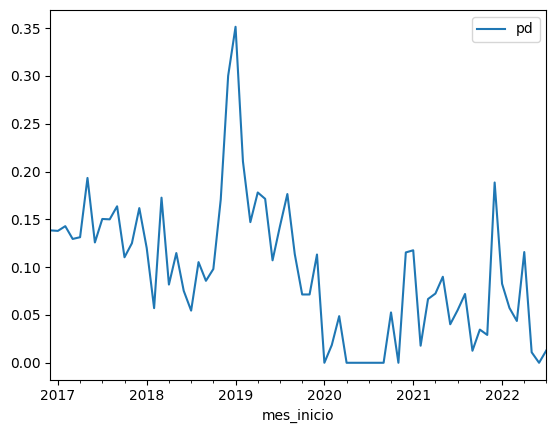

In [72]:
nivel_aprobacion.plot('mes_inicio','pd')

In [73]:
base_final_mora.describe()

CLIENTE    ventana30    ventana60   ventana90    ventana_R  \
count  6.089000e+03  1274.000000  1004.000000  807.000000  1986.000000   
mean   6.805129e+08    17.002407    18.605046   19.665675    16.768228   
std    1.603752e+08    14.744444    14.702634   14.509227    12.782248   
min    1.405200e+04     0.000000     0.000000    0.000000     0.000000   
25%    6.001468e+08     6.108333     8.066667    9.133333     6.133333   
50%    6.002102e+08    13.166667    14.200000   15.233333    14.166667   
75%    6.002580e+08    23.300000    24.583333   26.366667    28.366667   
max    9.901064e+08    66.933333    67.933333   67.933333    60.866667   

         Default30    Default60    Default90    Default_R  
count  6089.000000  6089.000000  6089.000000  6089.000000  
mean      0.095911     0.065528     0.043850     0.150928  
std       0.294493     0.247476     0.204777     0.358008  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000

In [74]:
base_final_mora[['Default30','Default_R']].head()

Default30  Default_R
0          0          0
1          0          0
2          0          0
3          0          1
4          0          0

In [75]:
base_final_mora['Default30'].value_counts()

0    5505
1     584
Name: Default30, dtype: int64

In [76]:
1-base_final_mora['Default30'].value_counts()[0]/len(base_final_mora)

0.09591065856462477

In [77]:
base_final_mora['Default60'].value_counts()

0    5690
1     399
Name: Default60, dtype: int64

In [78]:
1-base_final_mora['Default60'].value_counts()[0]/len(base_final_mora)

0.06552800131384462

In [79]:
base_final_mora['Default90'].value_counts()

0    5822
1     267
Name: Default90, dtype: int64

In [80]:
1-base_final_mora['Default90'].value_counts()[0]/len(base_final_mora)

0.043849564788963735

In [81]:
base_final_mora['Default_R'].value_counts()

0    5170
1     919
Name: Default_R, dtype: int64

In [82]:
1-base_final_mora['Default_R'].value_counts()[0]/len(base_final_mora)

0.15092790277549684

# NUEVOS FILTROS

In [83]:
base_final_mora.head()

CLIENTE mes_inicio Fecha_Mora30 Fecha_Mora60 Fecha_Mora90  \
0      14052 2019-03-01          NaT          NaT          NaT   
1  200111260 2018-05-01          NaT          NaT          NaT   
2  200194137 2018-01-01          NaT          NaT          NaT   
3  200194137 2019-06-01          NaT          NaT          NaT   
4  200202823 2017-06-01          NaT          NaT          NaT   

  mes_restructurado  ventana30  ventana60  ventana90  ventana_R  Default30  \
0               NaT        NaN        NaN        NaN        NaN          0   
1               NaT        NaN        NaN        NaN        NaN          0   
2               NaT        NaN        NaN        NaN        NaN          0   
3        2020-03-01        NaN        NaN        NaN   9.133333          0   
4               NaT        NaN        NaN        NaN        NaN          0   

   Default60  Default90  Default_R  
0          0          0          0  
1          0          0          0  
2          0          0          0  
3          0          0          1  
4          0          0          0

In [84]:
base_final_mora.loc[3,'mes_restructurado']

Timestamp('2020-03-01 00:00:00')

In [85]:
len(base_final_mora)

6089

In [86]:
base_final_mora.Default30.value_counts()

0    5505
1     584
Name: Default30, dtype: int64

In [87]:
filtro1 = (base_final_mora.mes_inicio>=pd.Timestamp(2019,1,1)) & (base_final_mora.mes_inicio<pd.Timestamp(2020,1,1))

filtro2 = base_final_mora.Default30==0

filtro3 = (base_final_mora.mes_restructurado>=pd.Timestamp(2020,1,1)) & (base_final_mora.mes_restructurado<pd.Timestamp(2020,12,1))

In [88]:
len(base_final_mora[((filtro1) & (filtro2) & (filtro3))])

301

In [89]:
len(base_final_mora[~((filtro1) & (filtro2) & (filtro3))])

5788

In [90]:
base_final_mora = base_final_mora[~((filtro1) & (filtro2) & (filtro3))]

In [91]:
base_final_mora.Default30.value_counts()

0    5204
1     584
Name: Default30, dtype: int64

# DEFAULT con REESTRUCTURADOS

In [92]:
base_final_mora['Default30'] = (base_final_mora['Default30'] == 1) | (base_final_mora['Default_R'] == 1)
base_final_mora['Default30'] = base_final_mora['Default30'].apply(lambda x: 0 if x==True else 1)
#base_final_mora['Def30'] = base_final_mora['Default30'] + base_final_mora['Default_R'] 

base_final_mora['Default60'] = (base_final_mora['Default60'] == 1) | (base_final_mora['Default_R'] == 1)
base_final_mora['Default60'] = base_final_mora['Default60'].apply(lambda x: 0 if x==True else 1)

base_final_mora['Default90'] = (base_final_mora['Default90'] == 1) | (base_final_mora['Default_R'] == 1)
base_final_mora['Default90'] = base_final_mora['Default90'].apply(lambda x: 0 if x==True else 1)

In [93]:
base_final_mora['Default30'].value_counts()

1    4646
0    1142
Name: Default30, dtype: int64

In [94]:
base_final_mora['Default60'].value_counts()

1    4787
0    1001
Name: Default60, dtype: int64

In [95]:
base_final_mora['Default90'].value_counts()

1    4891
0     897
Name: Default90, dtype: int64

In [96]:
base_final_mora['Default30'].value_counts()[0]/len(base_final_mora)

0.19730476848652384

In [97]:
len(base_final_mora)

5788

In [98]:
base_final_mora_ejemplo = base_final_mora

In [99]:
base_final_mora_ejemplo.head(2)

CLIENTE mes_inicio Fecha_Mora30 Fecha_Mora60 Fecha_Mora90  \
0      14052 2019-03-01          NaT          NaT          NaT   
1  200111260 2018-05-01          NaT          NaT          NaT   

  mes_restructurado  ventana30  ventana60  ventana90  ventana_R  Default30  \
0               NaT        NaN        NaN        NaN        NaN          1   
1               NaT        NaN        NaN        NaN        NaN          1   

   Default60  Default90  Default_R  
0          1          1          0  
1          1          1          0

In [100]:
base_final_mora_ejemplo.drop_duplicates(subset=['mes_inicio','CLIENTE'])

CLIENTE mes_inicio Fecha_Mora30 Fecha_Mora60 Fecha_Mora90  \
0         14052 2019-03-01          NaT          NaT          NaT   
1     200111260 2018-05-01          NaT          NaT          NaT   
2     200194137 2018-01-01          NaT          NaT          NaT   
4     200202823 2017-06-01          NaT          NaT          NaT   
5     200202823 2019-03-01          NaT          NaT          NaT   
7     200202823 2019-09-01          NaT          NaT          NaT   
8     201421604 2018-06-01          NaT          NaT          NaT   
9     201421604 2019-01-01          NaT          NaT          NaT   
10    201442214 2020-06-01          NaT          NaT          NaT   
11    201476823 2019-12-01          NaT          NaT          NaT   
12    201476823 2020-03-01          NaT          NaT          NaT   
13    201604443 2018-10-01          NaT          NaT          NaT   
14    201604443 2020-02-01          NaT          NaT          NaT   
15    201604443 2021-11-01          NaT          NaT          NaT   
16    201894919 2017-01-01          NaT          NaT          NaT   
17    201894919 2017-02-01          NaT          NaT          NaT   
18    201894919 2017-05-01          NaT          NaT          NaT   
19    201894919 2018-01-01          NaT          NaT          NaT   
20    201894919 2021-01-01          NaT          NaT          NaT   
21    201894919 2022-05-01          NaT          NaT          NaT   
22    201955981 2018-01-01          NaT          NaT          NaT   
23    201955981 2018-02-01          NaT          NaT          NaT   
25    201955981 2019-04-01          NaT          NaT          NaT   
26    202268555 2021-10-01          NaT          NaT          NaT   
27    202815936 2017-06-01          NaT          NaT          NaT   
28    202815936 2019-09-01          NaT          NaT          NaT   
29    202909805 2017-01-01          NaT          NaT          NaT   
30    202909805 2021-02-01          NaT          NaT          NaT   
31    203471210 2020-06-01          NaT          NaT          NaT   
32    203471210 2022-01-01          NaT          NaT          NaT   
33    204018404 2018-03-01          NaT          NaT          NaT   
34    204018404 2020-06-01          NaT          NaT          NaT   
35    205465792 2017-06-01          NaT          NaT          NaT   
36    205465792 2017-11-01          NaT          NaT          NaT   
37    205465792 2022-03-01          NaT          NaT          NaT   
38    300090017 2022-02-01          NaT          NaT          NaT   
39    300090043 2021-10-01          NaT          NaT          NaT   
40    300090374 2021-10-01          NaT          NaT          NaT   
41    300090418 2022-07-01          NaT          NaT          NaT   
42    300090501 2021-10-01          NaT          NaT          NaT   
43    541570949 2018-05-01          NaT          NaT          NaT   
44    600000083 2016-12-01          NaT          NaT          NaT   
45    600000083 2017-11-01          NaT          NaT          NaT   
46    600000083 2018-06-01          NaT          NaT          NaT   
47    600000344 2018-06-01          NaT          NaT          NaT   
48    600000344 2021-04-01          NaT          NaT          NaT   
49    600000391 2017-11-01          NaT          NaT          NaT   
50    600000391 2021-12-01          NaT          NaT          NaT   
51    600000430 2017-04-01          NaT          NaT          NaT   
52    600000692 2019-05-01          NaT          NaT          NaT   
54    600000750 2017-04-01   2021-10-01          NaT          NaT   
55    600000750 2018-05-01   2021-10-01          NaT          NaT   
56    600000750 2021-05-01   2021-10-01          NaT          NaT   
57    600001014 2017-03-01   2018-09-01   2018-10-01   2018-11-01   
58    600001308 2017-02-01          NaT          NaT          NaT   
59    600001308 2021-05-01          NaT          NaT          NaT   
60    600001308 2021-06-01          NaT          NaT          NaT   
61    

In [101]:
nivel_aprobacion = base_final_mora.groupby(['mes_inicio'])['Default30'].agg({"sum","count","mean"}).reset_index()
nivel_aprobacion['mora'] =1-nivel_aprobacion['sum']/nivel_aprobacion['count']
nivel_aprobacion

mes_inicio  count      mean  sum      mora
0  2016-12-01     65  0.861538   56  0.138462
1  2017-01-01     87  0.862069   75  0.137931
2  2017-02-01    119  0.857143  102  0.142857
3  2017-03-01    139  0.870504  121  0.129496
4  2017-04-01     99  0.868687   86  0.131313
5  2017-05-01    119  0.806723   96  0.193277
6  2017-06-01    151  0.874172  132  0.125828
7  2017-07-01    133  0.849624  113  0.150376
8  2017-08-01    140  0.850000  119  0.150000
9  2017-09-01    110  0.836364   92  0.163636
10 2017-10-01    145  0.889655  129  0.110345
11 2017-11-01    112  0.875000   98  0.125000
12 2017-12-01     68  0.838235   57  0.161765
13 2018-01-01     75  0.880000   66  0.120000
14 2018-02-01     70  0.942857   66  0.057143
15 2018-03-01    139  0.827338  115  0.172662
16 2018-04-01    110  0.918182  101  0.081818
17 2018-05-01     61  0.885246   54  0.114754
18 2018-06-01     93  0.924731   86  0.075269
19 2018-07-01     55  0.945455   52  0.054545
20 2018-08-01     57  0.894737   51  0.105263
21 2018-09-01     35  0.914286   32  0.085714
22 2018-10-01     51  0.901961   46  0.098039
23 2018-11-01     41  0.829268   34  0.170732
24 2018-12-01     40  0.700000   28  0.300000
25 2019-01-01     32  0.531250   17  0.468750
26 2019-02-01     36  0.638889   23  0.361111
27 2019-03-01     39  0.743590   29  0.256410
28 2019-04-01     45  0.688889   31  0.311111
29 2019-05-01     43  0.651163   28  0.348837
30 2019-06-01     48  0.729167   35  0.270833
31 2019-07-01     25  0.480000   12  0.520000
32 2019-08-01     18  0.666667   12  0.333333
33 2019-09-01     23  0.739130   17  0.260870
34 2019-10-01     13  0.538462    7  0.461538
35 2019-11-01     11  0.636364    7  0.363636
36 2019-12-01     26  0.423077   11  0.576923
37 2020-01-01     54  0.240741   13  0.759259
38 2020-02-01     54  0.240741   13  0.759259
39 2020-03-01     41  0.512195   21  0.487805
40 2020-04-01      7  0.142857    1  0.857143
41 2020-05-01     29  0.448276   13  0.551724
42 2020-06-01     24  0.750000   18  0.250000
43 2020-07-01     22  0.909091   20  0.090909
44 2020-08-01     18  0.722222   13  0.277778
45 2020-09-01     15  0.733333   11  0.266667
46 2020-10-01     19  0.526316   10  0.473684
47 2020-11-01     18  0.555556   10  0.444444
48 2020-12-01     26  0.500000   13  0.500000
49 2021-01-01     34  0.676471   23  0.323529
50 2021-02-01     56  0.642857   36  0.357143
51 2021-03-01    105  0.600000   63  0.400000
52 2021-04-01    221  0.787330  174  0.212670
53 2021-05-01    378  0.809524  306  0.190476
54 2021-06-01    149  0.563758   84  0.436242
55 2021-07-01    109  0.743119   81  0.256881
56 2021-08-01    139  0.690647   96  0.309353
57 2021-09-01    159  0.742138  118  0.257862
58 2021-10-01    144  0.819444  118  0.180556
59 2021-11-01    103  0.854369   88  0.145631
60 2021-12-01    122  0.696721   85  0.303279
61 2022-01-01    121  0.801653   97  0.198347
62 2022-02-01    157  0.923567  145  0.076433
63 2022-03-01    183  0.950820  174  0.049180
64 2022-04-01    190  0.847368  161  0.152632
65 2022-05-01    182  0.989011  180  0.010989
66 2022-06-01    160  0.956250  153  0.043750
67 2022-07-01     76  0.947368   72  0.052632

In [102]:
nivel_aprobacion.to_csv('../data/interim/nivel_aprobacion2.csv')

<AxesSubplot:xlabel='mes_inicio'>

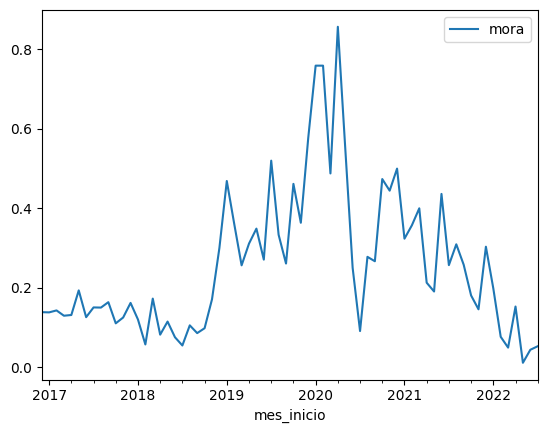

In [103]:
nivel_aprobacion.plot('mes_inicio','mora')

In [104]:
nivel_aprobacion = base_final_mora.groupby(['mes_inicio'])['Default60'].agg({"sum","count","mean"}).reset_index()
nivel_aprobacion['mora'] =1-nivel_aprobacion['sum']/nivel_aprobacion['count']
nivel_aprobacion

mes_inicio  count      mean  sum      mora
0  2016-12-01     65  0.892308   58  0.107692
1  2017-01-01     87  0.885057   77  0.114943
2  2017-02-01    119  0.890756  106  0.109244
3  2017-03-01    139  0.913669  127  0.086331
4  2017-04-01     99  0.898990   89  0.101010
5  2017-05-01    119  0.873950  104  0.126050
6  2017-06-01    151  0.933775  141  0.066225
7  2017-07-01    133  0.872180  116  0.127820
8  2017-08-01    140  0.892857  125  0.107143
9  2017-09-01    110  0.881818   97  0.118182
10 2017-10-01    145  0.910345  132  0.089655
11 2017-11-01    112  0.928571  104  0.071429
12 2017-12-01     68  0.941176   64  0.058824
13 2018-01-01     75  0.880000   66  0.120000
14 2018-02-01     70  0.971429   68  0.028571
15 2018-03-01    139  0.877698  122  0.122302
16 2018-04-01    110  0.954545  105  0.045455
17 2018-05-01     61  0.934426   57  0.065574
18 2018-06-01     93  0.956989   89  0.043011
19 2018-07-01     55  0.945455   52  0.054545
20 2018-08-01     57  0.912281   52  0.087719
21 2018-09-01     35  0.971429   34  0.028571
22 2018-10-01     51  0.901961   46  0.098039
23 2018-11-01     41  0.878049   36  0.121951
24 2018-12-01     40  0.775000   31  0.225000
25 2019-01-01     32  0.562500   18  0.437500
26 2019-02-01     36  0.638889   23  0.361111
27 2019-03-01     39  0.794872   31  0.205128
28 2019-04-01     45  0.688889   31  0.311111
29 2019-05-01     43  0.651163   28  0.348837
30 2019-06-01     48  0.729167   35  0.270833
31 2019-07-01     25  0.480000   12  0.520000
32 2019-08-01     18  0.666667   12  0.333333
33 2019-09-01     23  0.739130   17  0.260870
34 2019-10-01     13  0.615385    8  0.384615
35 2019-11-01     11  0.636364    7  0.363636
36 2019-12-01     26  0.423077   11  0.576923
37 2020-01-01     54  0.240741   13  0.759259
38 2020-02-01     54  0.240741   13  0.759259
39 2020-03-01     41  0.512195   21  0.487805
40 2020-04-01      7  0.142857    1  0.857143
41 2020-05-01     29  0.448276   13  0.551724
42 2020-06-01     24  0.750000   18  0.250000
43 2020-07-01     22  0.909091   20  0.090909
44 2020-08-01     18  0.722222   13  0.277778
45 2020-09-01     15  0.733333   11  0.266667
46 2020-10-01     19  0.526316   10  0.473684
47 2020-11-01     18  0.555556   10  0.444444
48 2020-12-01     26  0.500000   13  0.500000
49 2021-01-01     34  0.705882   24  0.294118
50 2021-02-01     56  0.660714   37  0.339286
51 2021-03-01    105  0.600000   63  0.400000
52 2021-04-01    221  0.819005  181  0.180995
53 2021-05-01    378  0.849206  321  0.150794
54 2021-06-01    149  0.563758   84  0.436242
55 2021-07-01    109  0.761468   83  0.238532
56 2021-08-01    139  0.719424  100  0.280576
57 2021-09-01    159  0.742138  118  0.257862
58 2021-10-01    144  0.819444  118  0.180556
59 2021-11-01    103  0.854369   88  0.145631
60 2021-12-01    122  0.704918   86  0.295082
61 2022-01-01    121  0.826446  100  0.173554
62 2022-02-01    157  0.936306  147  0.063694
63 2022-03-01    183  0.956284  175  0.043716
64 2022-04-01    190  0.894737  170  0.105263
65 2022-05-01    182  0.989011  180  0.010989
66 2022-06-01    160  0.956250  153  0.043750
67 2022-07-01     76  0.947368   72  0.052632

<AxesSubplot:xlabel='mes_inicio'>

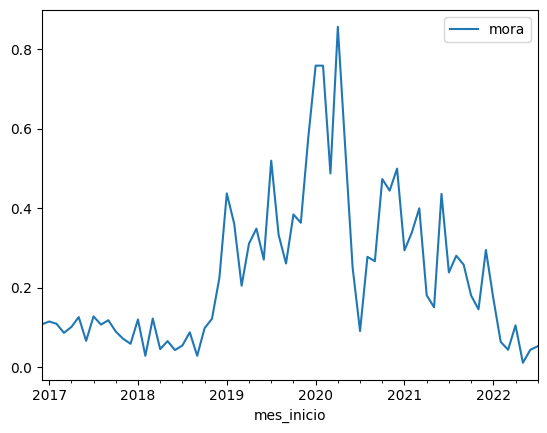

In [105]:
nivel_aprobacion.plot('mes_inicio','mora')

In [106]:
nivel_aprobacion = base_final_mora.groupby(['mes_inicio'])['Default90'].agg({"sum","count","mean"}).reset_index()
nivel_aprobacion['mora'] =1-nivel_aprobacion['sum']/nivel_aprobacion['count']
nivel_aprobacion

mes_inicio  count      mean  sum      mora
0  2016-12-01     65  0.923077   60  0.076923
1  2017-01-01     87  0.908046   79  0.091954
2  2017-02-01    119  0.890756  106  0.109244
3  2017-03-01    139  0.949640  132  0.050360
4  2017-04-01     99  0.959596   95  0.040404
5  2017-05-01    119  0.924370  110  0.075630
6  2017-06-01    151  0.947020  143  0.052980
7  2017-07-01    133  0.902256  120  0.097744
8  2017-08-01    140  0.950000  133  0.050000
9  2017-09-01    110  0.927273  102  0.072727
10 2017-10-01    145  0.924138  134  0.075862
11 2017-11-01    112  0.937500  105  0.062500
12 2017-12-01     68  0.970588   66  0.029412
13 2018-01-01     75  0.920000   69  0.080000
14 2018-02-01     70  0.971429   68  0.028571
15 2018-03-01    139  0.899281  125  0.100719
16 2018-04-01    110  0.981818  108  0.018182
17 2018-05-01     61  0.967213   59  0.032787
18 2018-06-01     93  0.967742   90  0.032258
19 2018-07-01     55  0.981818   54  0.018182
20 2018-08-01     57  0.964912   55  0.035088
21 2018-09-01     35  1.000000   35  0.000000
22 2018-10-01     51  0.901961   46  0.098039
23 2018-11-01     41  0.902439   37  0.097561
24 2018-12-01     40  0.775000   31  0.225000
25 2019-01-01     32  0.593750   19  0.406250
26 2019-02-01     36  0.638889   23  0.361111
27 2019-03-01     39  0.820513   32  0.179487
28 2019-04-01     45  0.688889   31  0.311111
29 2019-05-01     43  0.651163   28  0.348837
30 2019-06-01     48  0.750000   36  0.250000
31 2019-07-01     25  0.480000   12  0.520000
32 2019-08-01     18  0.722222   13  0.277778
33 2019-09-01     23  0.782609   18  0.217391
34 2019-10-01     13  0.615385    8  0.384615
35 2019-11-01     11  0.636364    7  0.363636
36 2019-12-01     26  0.423077   11  0.576923
37 2020-01-01     54  0.240741   13  0.759259
38 2020-02-01     54  0.240741   13  0.759259
39 2020-03-01     41  0.512195   21  0.487805
40 2020-04-01      7  0.142857    1  0.857143
41 2020-05-01     29  0.448276   13  0.551724
42 2020-06-01     24  0.750000   18  0.250000
43 2020-07-01     22  0.909091   20  0.090909
44 2020-08-01     18  0.722222   13  0.277778
45 2020-09-01     15  0.733333   11  0.266667
46 2020-10-01     19  0.526316   10  0.473684
47 2020-11-01     18  0.555556   10  0.444444
48 2020-12-01     26  0.500000   13  0.500000
49 2021-01-01     34  0.705882   24  0.294118
50 2021-02-01     56  0.660714   37  0.339286
51 2021-03-01    105  0.609524   64  0.390476
52 2021-04-01    221  0.832579  184  0.167421
53 2021-05-01    378  0.870370  329  0.129630
54 2021-06-01    149  0.577181   86  0.422819
55 2021-07-01    109  0.761468   83  0.238532
56 2021-08-01    139  0.726619  101  0.273381
57 2021-09-01    159  0.742138  118  0.257862
58 2021-10-01    144  0.826389  119  0.173611
59 2021-11-01    103  0.873786   90  0.126214
60 2021-12-01    122  0.721311   88  0.278689
61 2022-01-01    121  0.834711  101  0.165289
62 2022-02-01    157  0.936306  147  0.063694
63 2022-03-01    183  0.994536  182  0.005464
64 2022-04-01    190  0.931579  177  0.068421
65 2022-05-01    182  0.989011  180  0.010989
66 2022-06-01    160  0.956250  153  0.043750
67 2022-07-01     76  0.947368   72  0.052632

<AxesSubplot:xlabel='mes_inicio'>

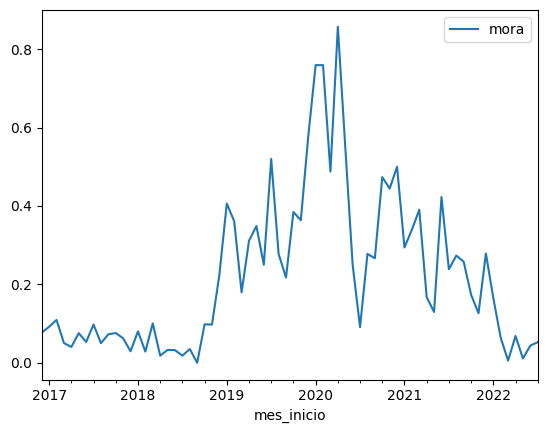

In [107]:
nivel_aprobacion.plot('mes_inicio','mora')

In [108]:
data_aprobada = base_final_mora

In [109]:
len(data_aprobada)

5788

# PANDEMIA

In [110]:
data_aprobada = data_aprobada[(data_aprobada.mes_inicio<=pd.Timestamp(2019,12,31)) | (data_aprobada.mes_inicio>=pd.Timestamp(2020,12,1))]

In [111]:
len(data_aprobada)

5487

# TIEMPO DE MADURACION

In [112]:
data_aprobada = data_aprobada[data_aprobada.mes_inicio<=pd.Timestamp(2021,7,31)]

In [113]:
len(data_aprobada)

3751

In [114]:
data_aprobada.loc[0,'mes_inicio']

Timestamp('2019-03-01 00:00:00')

In [115]:
data_aprobada.head()

CLIENTE mes_inicio Fecha_Mora30 Fecha_Mora60 Fecha_Mora90  \
0      14052 2019-03-01          NaT          NaT          NaT   
1  200111260 2018-05-01          NaT          NaT          NaT   
2  200194137 2018-01-01          NaT          NaT          NaT   
4  200202823 2017-06-01          NaT          NaT          NaT   
5  200202823 2019-03-01          NaT          NaT          NaT   

  mes_restructurado  ventana30  ventana60  ventana90  ventana_R  Default30  \
0               NaT        NaN        NaN        NaN        NaN          1   
1               NaT        NaN        NaN        NaN        NaN          1   
2               NaT        NaN        NaN        NaN        NaN          1   
4               NaT        NaN        NaN        NaN        NaN          1   
5               NaT        NaN        NaN        NaN        NaN          1   

   Default60  Default90  Default_R  
0          1          1          0  
1          1          1          0  
2          1          1          0  
4          1          1          0  
5          1          1          0

In [116]:
#data_aprobada = data_aprobada[data_aprobada.Default_R!=1]

In [117]:
vencidos30 = data_aprobada[data_aprobada['Fecha_Mora30'].notnull()]
vencidos60 = data_aprobada[data_aprobada['Fecha_Mora60'].notnull()]
vencidos90 = data_aprobada[data_aprobada['Fecha_Mora90'].notnull()]

In [118]:
vencidos30.describe()

CLIENTE    ventana30   ventana60   ventana90   ventana_R  \
count  1.115000e+03  1115.000000  890.000000  734.000000  429.000000   
mean   6.120364e+08    17.738206   19.349476   20.383106   21.658275   
std    5.798523e+07    14.954644   14.767007   14.503179   13.362607   
min    6.000008e+08     0.000000    0.000000    0.000000    0.000000   
25%    6.001504e+08     7.133333    9.100000   10.133333   10.133333   
50%    6.002038e+08    13.200000   15.200000   16.233333   24.366667   
75%    6.002208e+08    23.300000   25.333333   26.366667   32.466667   
max    9.900700e+08    66.933333   67.933333   67.933333   60.866667   

         Default30    Default60    Default90    Default_R  
count  1115.000000  1115.000000  1115.000000  1115.000000  
mean      0.549776     0.658296     0.732735     0.102242  
std       0.497739     0.474494     0.442730     0.303102  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000  
50%       1.000000     1.000000     1.000000     0.000000  
75%       1.000000     1.000000     1.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000

In [119]:
vencidos30.head()

CLIENTE mes_inicio Fecha_Mora30 Fecha_Mora60 Fecha_Mora90  \
54  600000750 2017-04-01   2021-10-01          NaT          NaT   
55  600000750 2018-05-01   2021-10-01          NaT          NaT   
56  600000750 2021-05-01   2021-10-01          NaT          NaT   
57  600001014 2017-03-01   2018-09-01   2018-10-01   2018-11-01   
78  600002522 2017-02-01   2018-07-01   2018-08-01   2018-09-01   

   mes_restructurado  ventana30  ventana60  ventana90  ventana_R  Default30  \
54               NaT  54.800000        NaN        NaN        NaN          1   
55        2020-03-01  41.633333        NaN        NaN  22.333333          1   
56               NaT   5.100000        NaN        NaN        NaN          0   
57               NaT  18.300000       19.3  20.333333        NaN          1   
78               NaT  17.166667       18.2  19.233333        NaN          1   

    Default60  Default90  Default_R  
54          1          1          0  
55          1          1          0  
56          1          1          0  
57          1          1          0  
78          1          1          0

In [120]:
len(vencidos30)

1115

In [121]:
vencidos30 = vencidos30[vencidos30.Default_R != 1]

In [122]:
len(vencidos30)

1001

In [123]:
len(vencidos60)

890

In [124]:
#vencidos60 = vencidos60[vencidos60.Default_R != 1]

In [125]:
len(vencidos60)

890

In [126]:
len(vencidos90)

734

In [127]:
#vencidos90 = vencidos90[vencidos90.Default_R != 1]

In [128]:
len(vencidos90)

734

#### DESMEJORA 30-60

In [129]:
vencidos60['days'] = vencidos60['Fecha_Mora60'] - vencidos60['Fecha_Mora30']
vencidos60['days'] = vencidos60['days'].fillna(0)
vencidos60['days'] = vencidos60['days'].apply(lambda x: x.days)
vencidos60['desmejora'] = vencidos60['days'].apply(lambda x: 1 if x<=31 else 0)
vencidos60['desmejora'].head()

C:\Users\alber\anaconda3\envs\Quash_sh\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\alber\anaconda3\envs\Quash_sh\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  
C:\Users\alber\anaconda3\envs\Quash_sh\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

57     1
78     1
80     0
90     1
112    1
Name: desmejora, dtype: int64

In [130]:
desmejora60 = vencidos60['desmejora'].value_counts()
desmejora60

1    716
0    174
Name: desmejora, dtype: int64

In [131]:
morosos30 = len(data_aprobada[(data_aprobada.Fecha_Mora30.notnull())])
morosos30

1115

In [132]:
len(data_aprobada)

3751

In [133]:
desmejora60[1] / morosos30

0.6421524663677131

#### DESMEJORA 60 - 90

In [134]:
vencidos90['days'] = vencidos90['Fecha_Mora90'] - vencidos60['Fecha_Mora60']
vencidos90['days'] = vencidos90['days'].fillna(0)
vencidos90['days'] = vencidos90['days'].apply(lambda x: x.days)
vencidos90['desmejora'] = vencidos90['days'].apply(lambda x: 1 if x<=31 else 0)
vencidos90['desmejora'].head()

C:\Users\alber\anaconda3\envs\Quash_sh\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\alber\anaconda3\envs\Quash_sh\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  
C:\Users\alber\anaconda3\envs\Quash_sh\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

57     1
78     1
80     1
90     0
112    1
Name: desmejora, dtype: int64

In [135]:
desmejora90 = vencidos90['desmejora'].value_counts()
desmejora90

1    638
0     96
Name: desmejora, dtype: int64

In [136]:
morosos60 = len(data_aprobada[(data_aprobada.Fecha_Mora60.notnull())])
morosos60

890

In [137]:
desmejora90[1] / morosos60

0.7168539325842697

In [138]:
data_aprobada.describe()

CLIENTE    ventana30   ventana60   ventana90    ventana_R  \
count  3.751000e+03  1115.000000  890.000000  734.000000  1342.000000   
mean   6.292220e+08    17.738206   19.349476   20.383106    22.155042   
std    1.062199e+08    14.954644   14.767007   14.503179    11.890110   
min    1.405200e+04     0.000000    0.000000    0.000000     0.000000   
25%    6.001369e+08     7.133333    9.100000   10.133333    10.433333   
50%    6.001996e+08    13.200000   15.200000   16.233333    24.366667   
75%    6.002252e+08    23.300000   25.333333   26.366667    31.433333   
max    9.900700e+08    66.933333   67.933333   67.933333    60.866667   

         Default30    Default60    Default90    Default_R  
count  3751.000000  3751.000000  3751.000000  3751.000000  
mean      0.804052     0.836310     0.858438     0.092509  
std       0.396981     0.370043     0.348647     0.289781  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     1.000000     1.000000     0.000000  
50%       1.000000     1.000000     1.000000     0.000000  
75%       1.000000     1.000000     1.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000

In [139]:
data_aprobada['ventana90'] = data_aprobada['ventana90'].apply(lambda x: math.ceil(x)+1 if math.isnan(x) == False else x)
data_aprobada['ventana60'] = data_aprobada['ventana60'].apply(lambda x:  math.ceil(x)+1 if math.isnan(x) == False else x)
data_aprobada['ventana30'] = data_aprobada['ventana30'].apply(lambda x:  math.ceil(x)+1 if math.isnan(x) == False else x)

#### MALOS PAGADORES EN VENTANAS DE TIEMPO (MESES)

In [140]:
resumen_ventana = data_aprobada[['ventana30','CLIENTE']].groupby('ventana30').count().reset_index()
resumen_ventana = resumen_ventana.rename(columns={'CLIENTE':'Total_Clientes'})
resumen_ventana['Total_Clientes_Acum'] = resumen_ventana['Total_Clientes'].cumsum()
resumen_ventana['Acum_porcentaje'] = 100*resumen_ventana['Total_Clientes_Acum']/resumen_ventana['Total_Clientes'].sum()
resumen_ventana['Acum_porc_Data_Total'] = 100*resumen_ventana['Total_Clientes_Acum']/len(data_aprobada)
resumen_ventana

ventana30  Total_Clientes  Total_Clientes_Acum  Acum_porcentaje  \
0         1.0              23                   23         2.062780   
1         2.0               2                   25         2.242152   
2         3.0               8                   33         2.959641   
3         4.0              32                   65         5.829596   
4         5.0              58                  123        11.031390   
5         6.0              38                  161        14.439462   
6         7.0              57                  218        19.551570   
7         8.0              41                  259        23.228700   
8         9.0              33                  292        26.188341   
9        10.0              53                  345        30.941704   
10       11.0              45                  390        34.977578   
11       12.0              49                  439        39.372197   
12       13.0              46                  485        43.497758   
13       14.0              37                  522        46.816143   
14       15.0              49                  571        51.210762   
15       16.0              53                  624        55.964126   
16       17.0              33                  657        58.923767   
17       18.0              27                  684        61.345291   
18       19.0              33                  717        64.304933   
19       20.0              26                  743        66.636771   
20       21.0              23                  766        68.699552   
21       22.0              20                  786        70.493274   
22       23.0              27                  813        72.914798   
23       24.0              20                  833        74.708520   
24       25.0              19                  852        76.412556   
25       26.0              16                  868        77.847534   
26       27.0              19                  887        79.551570   
27       28.0              16                  903        80.986547   
28       29.0              12                  915        82.062780   
29       30.0              14                  929        83.318386   
30       31.0              11                  940        84.304933   
31       32.0              17                  957        85.829596   
32       33.0               6                  963        86.367713   
33       34.0               8                  971        87.085202   
34       35.0               6                  977        87.623318   
35       36.0               3                  980        87.892377   
36       37.0               4                  984        88.251121   
37       38.0               1                  985        88.340807   
38       40.0               3                  988        88.609865   
39       41.0               2                  990        88.789238   
40       42.0               2                  992        88.968610   
41       43.0               3                  995        89.237668   
42       44.0               9                 1004        90.044843   
43       45.0               3                 1007        90.313901   
44       46.0               7                 1014        90.941704   
45       47.0               3                 1017        91.210762   
46       48.0               4                 1021        91.569507   
47       49.0               8                 1029        92.286996   
48       50.0               4                 1033        92.645740   
49       51.0               7                 1040        93.273543   
50       52.0               5                 1045        93.721973   
51       53.0               8                 1053        94.439462   
52       54.0               3                 1056        94.708520   
53       55.0               6                 1062        95.246637   
54       56.0               5                 1067        95.695067   
55       57.0               

In [141]:
resumen_ventana.to_csv('../data/interim/resumen_ventana_30.csv')

In [142]:
resumen_ventana = data_aprobada[['ventana60','CLIENTE']].groupby('ventana60').count().reset_index()
resumen_ventana = resumen_ventana.rename(columns={'CLIENTE':'Total_Clientes'})
resumen_ventana['Total_Clientes_Acum'] = resumen_ventana['Total_Clientes'].cumsum()
resumen_ventana['Acum_porcentaje'] = 100*resumen_ventana['Total_Clientes_Acum']/resumen_ventana['Total_Clientes'].sum()
resumen_ventana['Acum_porc_Data_Total'] = 100*resumen_ventana['Total_Clientes_Acum']/len(data_aprobada)
resumen_ventana

ventana60  Total_Clientes  Total_Clientes_Acum  Acum_porcentaje  \
0         1.0              11                   11         1.235955   
1         2.0               3                   14         1.573034   
2         3.0               3                   17         1.910112   
3         4.0               7                   24         2.696629   
4         5.0              16                   40         4.494382   
5         6.0              38                   78         8.764045   
6         7.0              30                  108        12.134831   
7         8.0              38                  146        16.404494   
8         9.0              35                  181        20.337079   
9        10.0              30                  211        23.707865   
10       11.0              35                  246        27.640449   
11       12.0              36                  282        31.685393   
12       13.0              46                  328        36.853933   
13       14.0              40                  368        41.348315   
14       15.0              31                  399        44.831461   
15       16.0              42                  441        49.550562   
16       17.0              26                  467        52.471910   
17       18.0              30                  497        55.842697   
18       19.0              23                  520        58.426966   
19       20.0              22                  542        60.898876   
20       21.0              20                  562        63.146067   
21       22.0              24                  586        65.842697   
22       23.0              12                  598        67.191011   
23       24.0              31                  629        70.674157   
24       25.0              17                  646        72.584270   
25       26.0              20                  666        74.831461   
26       27.0              11                  677        76.067416   
27       28.0              21                  698        78.426966   
28       29.0              12                  710        79.775281   
29       30.0              15                  725        81.460674   
30       31.0              11                  736        82.696629   
31       32.0              13                  749        84.157303   
32       33.0              16                  765        85.955056   
33       34.0               4                  769        86.404494   
34       35.0               5                  774        86.966292   
35       36.0               7                  781        87.752809   
36       37.0               1                  782        87.865169   
37       38.0               3                  785        88.202247   
38       39.0               2                  787        88.426966   
39       41.0               2                  789        88.651685   
40       42.0               2                  791        88.876404   
41       44.0               2                  793        89.101124   
42       45.0               6                  799        89.775281   
43       46.0               4                  803        90.224719   
44       47.0               6                  809        90.898876   
45       48.0               2                  811        91.123596   
46       49.0               4                  815        91.573034   
47       50.0              10                  825        92.696629   
48       51.0               3                  828        93.033708   
49       52.0               6                  834        93.707865   
50       53.0               4                  838        94.157303   
51       54.0               3                  841        94.494382   
52       55.0               1                  842        94.606742   
53       56.0               4                  846        95.056180   
54       57.0               4                  850        95.505618   
55       58.0               

In [143]:
resumen_ventana.to_csv('../data/interim/resumen_ventana_60.csv')

In [144]:
len(data_aprobada)

3751

In [145]:
len(data_aprobada.CLIENTE.unique())

2650

In [146]:
nivel_aprobacion = data_aprobada.groupby(['mes_inicio'])['Default30'].agg({"sum","count","mean"}).reset_index()
nivel_aprobacion['mora'] =1-nivel_aprobacion['sum']/nivel_aprobacion['count']
nivel_aprobacion

mes_inicio  count      mean  sum      mora
0  2016-12-01     65  0.861538   56  0.138462
1  2017-01-01     87  0.862069   75  0.137931
2  2017-02-01    119  0.857143  102  0.142857
3  2017-03-01    139  0.870504  121  0.129496
4  2017-04-01     99  0.868687   86  0.131313
5  2017-05-01    119  0.806723   96  0.193277
6  2017-06-01    151  0.874172  132  0.125828
7  2017-07-01    133  0.849624  113  0.150376
8  2017-08-01    140  0.850000  119  0.150000
9  2017-09-01    110  0.836364   92  0.163636
10 2017-10-01    145  0.889655  129  0.110345
11 2017-11-01    112  0.875000   98  0.125000
12 2017-12-01     68  0.838235   57  0.161765
13 2018-01-01     75  0.880000   66  0.120000
14 2018-02-01     70  0.942857   66  0.057143
15 2018-03-01    139  0.827338  115  0.172662
16 2018-04-01    110  0.918182  101  0.081818
17 2018-05-01     61  0.885246   54  0.114754
18 2018-06-01     93  0.924731   86  0.075269
19 2018-07-01     55  0.945455   52  0.054545
20 2018-08-01     57  0.894737   51  0.105263
21 2018-09-01     35  0.914286   32  0.085714
22 2018-10-01     51  0.901961   46  0.098039
23 2018-11-01     41  0.829268   34  0.170732
24 2018-12-01     40  0.700000   28  0.300000
25 2019-01-01     32  0.531250   17  0.468750
26 2019-02-01     36  0.638889   23  0.361111
27 2019-03-01     39  0.743590   29  0.256410
28 2019-04-01     45  0.688889   31  0.311111
29 2019-05-01     43  0.651163   28  0.348837
30 2019-06-01     48  0.729167   35  0.270833
31 2019-07-01     25  0.480000   12  0.520000
32 2019-08-01     18  0.666667   12  0.333333
33 2019-09-01     23  0.739130   17  0.260870
34 2019-10-01     13  0.538462    7  0.461538
35 2019-11-01     11  0.636364    7  0.363636
36 2019-12-01     26  0.423077   11  0.576923
37 2020-12-01     26  0.500000   13  0.500000
38 2021-01-01     34  0.676471   23  0.323529
39 2021-02-01     56  0.642857   36  0.357143
40 2021-03-01    105  0.600000   63  0.400000
41 2021-04-01    221  0.787330  174  0.212670
42 2021-05-01    378  0.809524  306  0.190476
43 2021-06-01    149  0.563758   84  0.436242
44 2021-07-01    109  0.743119   81  0.256881

<AxesSubplot:xlabel='mes_inicio'>

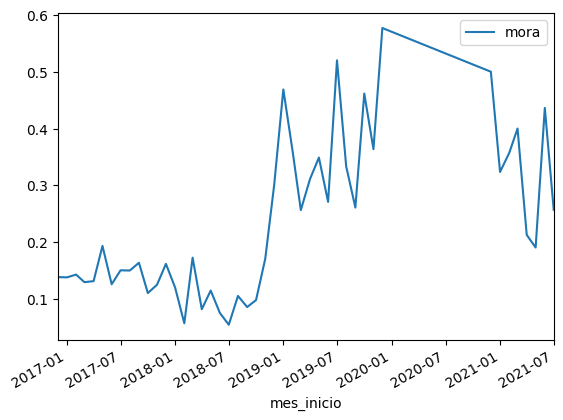

In [147]:
nivel_aprobacion.plot('mes_inicio','mora')

In [148]:
data_aprobada

CLIENTE mes_inicio Fecha_Mora30 Fecha_Mora60 Fecha_Mora90  \
0         14052 2019-03-01          NaT          NaT          NaT   
1     200111260 2018-05-01          NaT          NaT          NaT   
2     200194137 2018-01-01          NaT          NaT          NaT   
4     200202823 2017-06-01          NaT          NaT          NaT   
5     200202823 2019-03-01          NaT          NaT          NaT   
7     200202823 2019-09-01          NaT          NaT          NaT   
8     201421604 2018-06-01          NaT          NaT          NaT   
9     201421604 2019-01-01          NaT          NaT          NaT   
11    201476823 2019-12-01          NaT          NaT          NaT   
13    201604443 2018-10-01          NaT          NaT          NaT   
16    201894919 2017-01-01          NaT          NaT          NaT   
17    201894919 2017-02-01          NaT          NaT          NaT   
18    201894919 2017-05-01          NaT          NaT          NaT   
19    201894919 2018-01-01          NaT          NaT          NaT   
20    201894919 2021-01-01          NaT          NaT          NaT   
22    201955981 2018-01-01          NaT          NaT          NaT   
23    201955981 2018-02-01          NaT          NaT          NaT   
25    201955981 2019-04-01          NaT          NaT          NaT   
27    202815936 2017-06-01          NaT          NaT          NaT   
28    202815936 2019-09-01          NaT          NaT          NaT   
29    202909805 2017-01-01          NaT          NaT          NaT   
30    202909805 2021-02-01          NaT          NaT          NaT   
33    204018404 2018-03-01          NaT          NaT          NaT   
35    205465792 2017-06-01          NaT          NaT          NaT   
36    205465792 2017-11-01          NaT          NaT          NaT   
43    541570949 2018-05-01          NaT          NaT          NaT   
44    600000083 2016-12-01          NaT          NaT          NaT   
45    600000083 2017-11-01          NaT          NaT          NaT   
46    600000083 2018-06-01          NaT          NaT          NaT   
47    600000344 2018-06-01          NaT          NaT          NaT   
48    600000344 2021-04-01          NaT          NaT          NaT   
49    600000391 2017-11-01          NaT          NaT          NaT   
51    600000430 2017-04-01          NaT          NaT          NaT   
52    600000692 2019-05-01          NaT          NaT          NaT   
54    600000750 2017-04-01   2021-10-01          NaT          NaT   
55    600000750 2018-05-01   2021-10-01          NaT          NaT   
56    600000750 2021-05-01   2021-10-01          NaT          NaT   
57    600001014 2017-03-01   2018-09-01   2018-10-01   2018-11-01   
58    600001308 2017-02-01          NaT          NaT          NaT   
59    600001308 2021-05-01          NaT          NaT          NaT   
60    600001308 2021-06-01          NaT          NaT          NaT   
61    600001430 2021-05-01          NaT          NaT          NaT   
62    600001475 2018-12-01          NaT          NaT          NaT   
63    600001953 2017-02-01          NaT          NaT          NaT   
65    600001987 2019-05-01          NaT          NaT          NaT   
66    600002203 2019-08-01          NaT          NaT          NaT   
67    600002213 2018-03-01          NaT          NaT          NaT   
70    600002311 2021-04-01          NaT          NaT          NaT   
71    600002337 2016-12-01          NaT          NaT          NaT   
72    600002337 2018-10-01          NaT          NaT          NaT   
73    600002337 2021-05-01          NaT          NaT          NaT   
77    600002493 2019-03-01          NaT          NaT          NaT   
78    600002522 2017-02-01   2018-07-01   2018-08-01   2018-09-01   
79    600002522 2019-06-01          NaT          NaT          NaT   
80    600002751 2017-08-01   2018-10-01   2019-06-01   2019-07-01   
81    600002751 2021-06-01          NaT          NaT          NaT   
83    600003539 2018-05-01          NaT          NaT          NaT   
85    

In [149]:
data_modelo = data_aprobada[['CLIENTE','mes_inicio','Default30','Default60','Default90','Default_R']].reset_index(drop=True)
data_modelo

CLIENTE mes_inicio  Default30  Default60  Default90  Default_R
0         14052 2019-03-01          1          1          1          0
1     200111260 2018-05-01          1          1          1          0
2     200194137 2018-01-01          1          1          1          0
3     200202823 2017-06-01          1          1          1          0
4     200202823 2019-03-01          1          1          1          0
5     200202823 2019-09-01          1          1          1          0
6     201421604 2018-06-01          1          1          1          0
7     201421604 2019-01-01          1          1          1          0
8     201476823 2019-12-01          1          1          1          0
9     201604443 2018-10-01          1          1          1          0
10    201894919 2017-01-01          1          1          1          0
11    201894919 2017-02-01          1          1          1          0
12    201894919 2017-05-01          1          1          1          0
13    201894919 2018-01-01          1          1          1          0
14    201894919 2021-01-01          1          1          1          0
15    201955981 2018-01-01          1          1          1          0
16    201955981 2018-02-01          1          1          1          0
17    201955981 2019-04-01          1          1          1          0
18    202815936 2017-06-01          1          1          1          0
19    202815936 2019-09-01          1          1          1          0
20    202909805 2017-01-01          1          1          1          0
21    202909805 2021-02-01          1          1          1          0
22    204018404 2018-03-01          1          1          1          0
23    205465792 2017-06-01          1          1          1          0
24    205465792 2017-11-01          1          1          1          0
25    541570949 2018-05-01          1          1          1          0
26    600000083 2016-12-01          1          1          1          0
27    600000083 2017-11-01          1          1          1          0
28    600000083 2018-06-01          1          1          1          0
29    600000344 2018-06-01          1          1          1          0
30    600000344 2021-04-01          1          1          1          0
31    600000391 2017-11-01          1          1          1          0
32    600000430 2017-04-01          1          1          1          0
33    600000692 2019-05-01          0          0          0          1
34    600000750 2017-04-01          1          1          1          0
35    600000750 2018-05-01          1          1          1          0
36    600000750 2021-05-01          0          1          1          0
37    600001014 2017-03-01          1          1          1          0
38    600001308 2017-02-01          1          1          1          0
39    600001308 2021-05-01          1          1          1          0
40    600001308 2021-06-01          0          0          0          1
41    600001430 2021-05-01          1          1          1          0
42    600001475 2018-12-01          1          1          1          0
43    600001953 2017-02-01          1          1          1          0
44    600001987 2019-05-01          0          0          0          1
45    600002203 2019-08-01          1          1          1          0
46    600002213 2018-03-01          1          1          1          0
47    600002311 2021-04-01          0          0          0          1
48    600002337 2016-12-01          1          1          1          0
49    600002337 2018-10-01          1          1          1          0
50    600002337 2021-05-01          1          1          1          0
51    600002493 2019-03-01          1          1          1          0
52    600002522 2017-02-01          1          1          1          0
53    600002522 2019-06-01          0          0          0          1
54    600002751 2017-08-01          1          1          1          0
55    600002751 2021-06-01      

In [150]:
data_modelo.Default30.value_counts()

1    3016
0     735
Name: Default30, dtype: int64

In [151]:
data_modelo.Default30.value_counts()[0]/len(data_modelo)

0.19594774726739536

In [152]:
#data_modelo.to_csv('data_modelo_r.csv')

In [153]:
len(data_modelo)

3751

In [154]:
data_modelo.loc[0,'mes_inicio']

Timestamp('2019-03-01 00:00:00')

#### Se eliminaron primeros 3 meses porque mas adelante se construiran variables de 3 meses hacia atras, entonces para que todas las cosechas tengan las mismas condiciones

In [155]:
len(data_modelo[data_modelo['mes_inicio']>= pd.Timestamp(2017, 4, 1)])

3341

In [156]:
data_modelo = data_modelo[data_modelo['mes_inicio']>= pd.Timestamp(2017, 4, 1)]

In [157]:
len(data_modelo)

3341

#### FINALMENTE EXPORTAMOS LA DATA COMO UN CSV

In [158]:
data_modelo.to_csv('../data/interim/data_modelo_r.csv')

In [159]:
data_modelo_ejemplo = data_modelo

In [160]:
data_modelo_ejemplo.drop_duplicates(subset=['mes_inicio','CLIENTE'])

CLIENTE mes_inicio  Default30  Default60  Default90  Default_R
0         14052 2019-03-01          1          1          1          0
1     200111260 2018-05-01          1          1          1          0
2     200194137 2018-01-01          1          1          1          0
3     200202823 2017-06-01          1          1          1          0
4     200202823 2019-03-01          1          1          1          0
5     200202823 2019-09-01          1          1          1          0
6     201421604 2018-06-01          1          1          1          0
7     201421604 2019-01-01          1          1          1          0
8     201476823 2019-12-01          1          1          1          0
9     201604443 2018-10-01          1          1          1          0
12    201894919 2017-05-01          1          1          1          0
13    201894919 2018-01-01          1          1          1          0
14    201894919 2021-01-01          1          1          1          0
15    201955981 2018-01-01          1          1          1          0
16    201955981 2018-02-01          1          1          1          0
17    201955981 2019-04-01          1          1          1          0
18    202815936 2017-06-01          1          1          1          0
19    202815936 2019-09-01          1          1          1          0
21    202909805 2021-02-01          1          1          1          0
22    204018404 2018-03-01          1          1          1          0
23    205465792 2017-06-01          1          1          1          0
24    205465792 2017-11-01          1          1          1          0
25    541570949 2018-05-01          1          1          1          0
27    600000083 2017-11-01          1          1          1          0
28    600000083 2018-06-01          1          1          1          0
29    600000344 2018-06-01          1          1          1          0
30    600000344 2021-04-01          1          1          1          0
31    600000391 2017-11-01          1          1          1          0
32    600000430 2017-04-01          1          1          1          0
33    600000692 2019-05-01          0          0          0          1
34    600000750 2017-04-01          1          1          1          0
35    600000750 2018-05-01          1          1          1          0
36    600000750 2021-05-01          0          1          1          0
39    600001308 2021-05-01          1          1          1          0
40    600001308 2021-06-01          0          0          0          1
41    600001430 2021-05-01          1          1          1          0
42    600001475 2018-12-01          1          1          1          0
44    600001987 2019-05-01          0          0          0          1
45    600002203 2019-08-01          1          1          1          0
46    600002213 2018-03-01          1          1          1          0
47    600002311 2021-04-01          0          0          0          1
49    600002337 2018-10-01          1          1          1          0
50    600002337 2021-05-01          1          1          1          0
51    600002493 2019-03-01          1          1          1          0
53    600002522 2019-06-01          0          0          0          1
54    600002751 2017-08-01          1          1          1          0
55    600002751 2021-06-01          1          1          1          0
56    600003539 2018-05-01          1          1          1          0
58    600004097 2017-10-01          1          1          1          0
59    600004097 2021-05-01          1          1          1          0
61    600004770 2021-07-01          1          1          1          0
63    600004922 2017-05-01          1          1          1          0
64    600004922 2018-03-01          1          1          1          0
65    600005403 2019-07-01          1          1          1          0
66    600006029 2019-02-01          1          1          1          0
67    600006029 2020-12-01      